### Problem Statement - TSF Project
##### Context
As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

##### Objective
The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

--------------------------------------------------------------------------

## Sparkling wine sale

#### QUESTION-1

### Define the problem and perform Exploratory Data Analysis
##### - Read the data as an appropriate time series data - Plot the data - Perform EDA - Perform      Decomposition

In [1]:
#import the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read Data Set
df_1=pd.read_csv("Sparkling.csv")

In [3]:
#first 5 rows of the dataSet
df_1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

#Read the data as an appropriate time series data 

In [4]:
df_1=pd.read_csv("Sparkling.csv",parse_dates=True,index_col="YearMonth")

In [5]:
#first 5 rows of the Data set
df_1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

###### Plot the data 

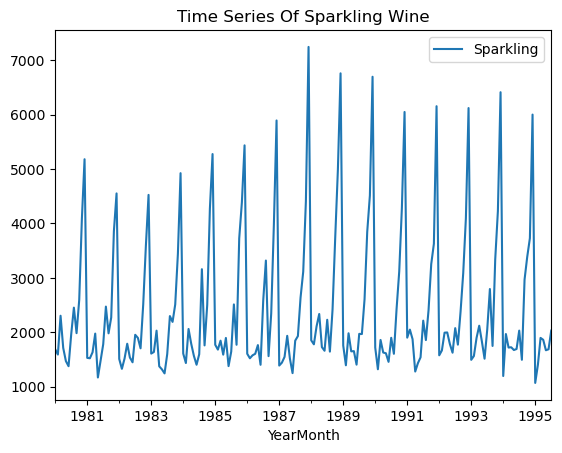

In [6]:
#Time Series Of Sparkling Wine
df_1.plot()
plt.title("Time Series Of Sparkling Wine");

Time series have strong Seasonality 

 #### Perform EDA

In [7]:
#check information about the data set
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


No missing value in tis Data Set

In [8]:
#statical summary of the data set
df_1.describe()


Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [9]:
import seaborn as sns

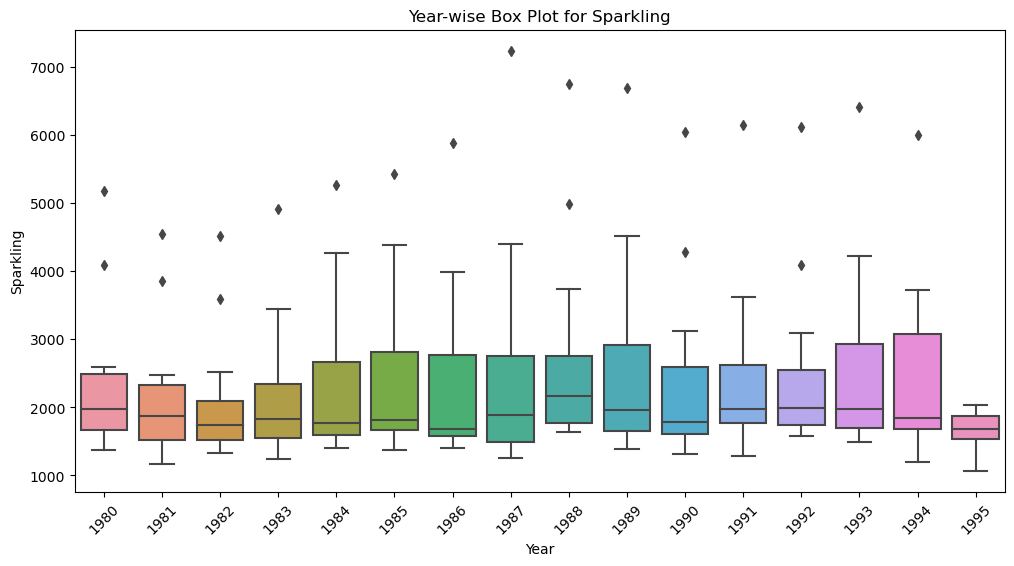

In [10]:
#Year-wise Box Plot for Sparkling wine sale
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1, x=df_1.index.year, y='Sparkling')
plt.title('Year-wise Box Plot for Sparkling')
plt.xlabel('Year')
plt.ylabel('Sparkling')
plt.xticks(rotation=45)
plt.show()

* From the above year wise box plot it is clearly  visile all the year have outliers
* year 1995 alone doesn't have outliers

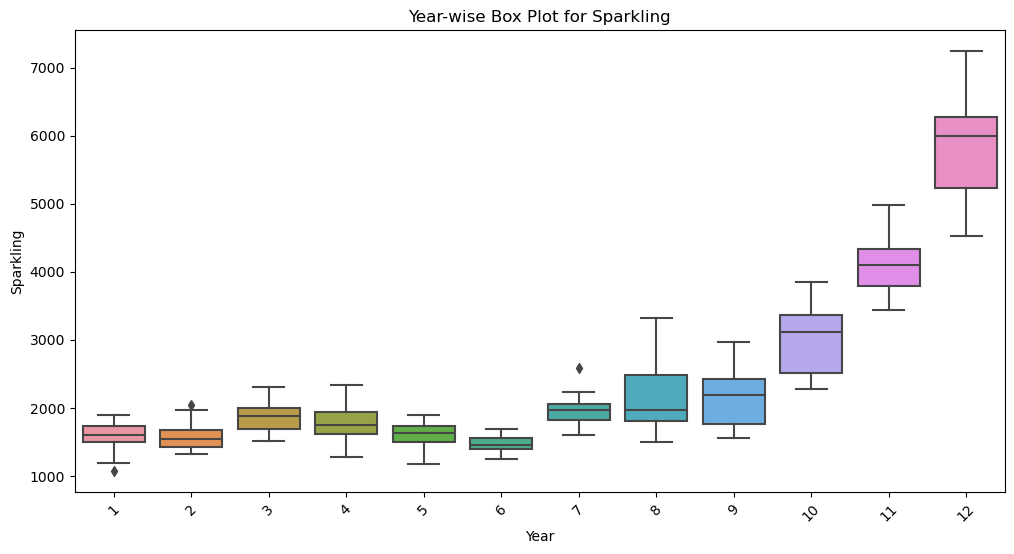

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1, x=df_1.index.month, y='Sparkling')
plt.title('Year-wise Box Plot for Sparkling')
plt.xlabel('Year')
plt.ylabel('Sparkling')
plt.xticks(rotation=45)
plt.show()

* from the above Month wise box plot across the year it is clearly visible January ,February & july  month has outliers
* Across the year December month  shows highest sale
* june month shows the lowest sale across the year
* Throug this boxplot we could understand seasonality present in the sparkling dataset





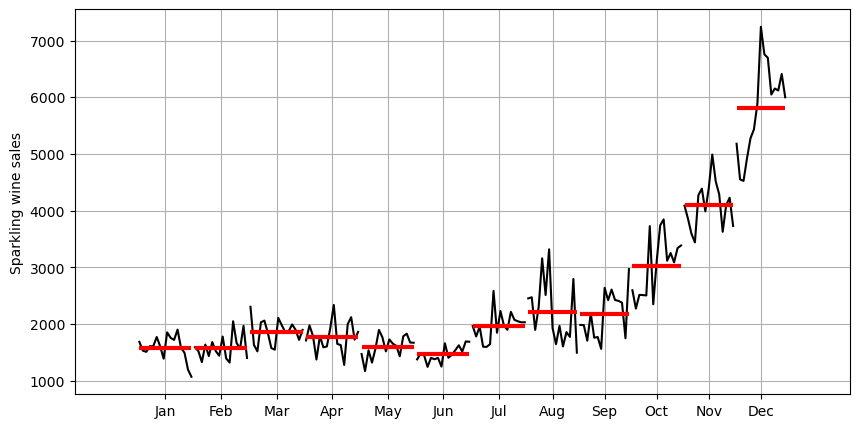

In [12]:
#monthly plot of Sparkling wine sales
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(10,5))
month_plot(df_1,ylabel="Sparkling wine sales",ax=ax)
plt.grid();

* This plot shows the behavior of the Time series ("Sparkling wine sales") across various month.The red line  is the median value.
* As already seen Decemer month has highest  sale.

##### Pivot Table

In [13]:
#pivot table
yearly_sales_across_months=pd.pivot_table(data=df_1,values="Sparkling",index=df_1.index.year,columns=df_1.index.month)
yearly_sales_across_months

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

* Sparkling data are grouped in month wise.
* Month are represented in numbers 1 to 12
* The largest sales of the year occur in December. 
* The best sales month was December in 1987with 7242 units of sparkling wine

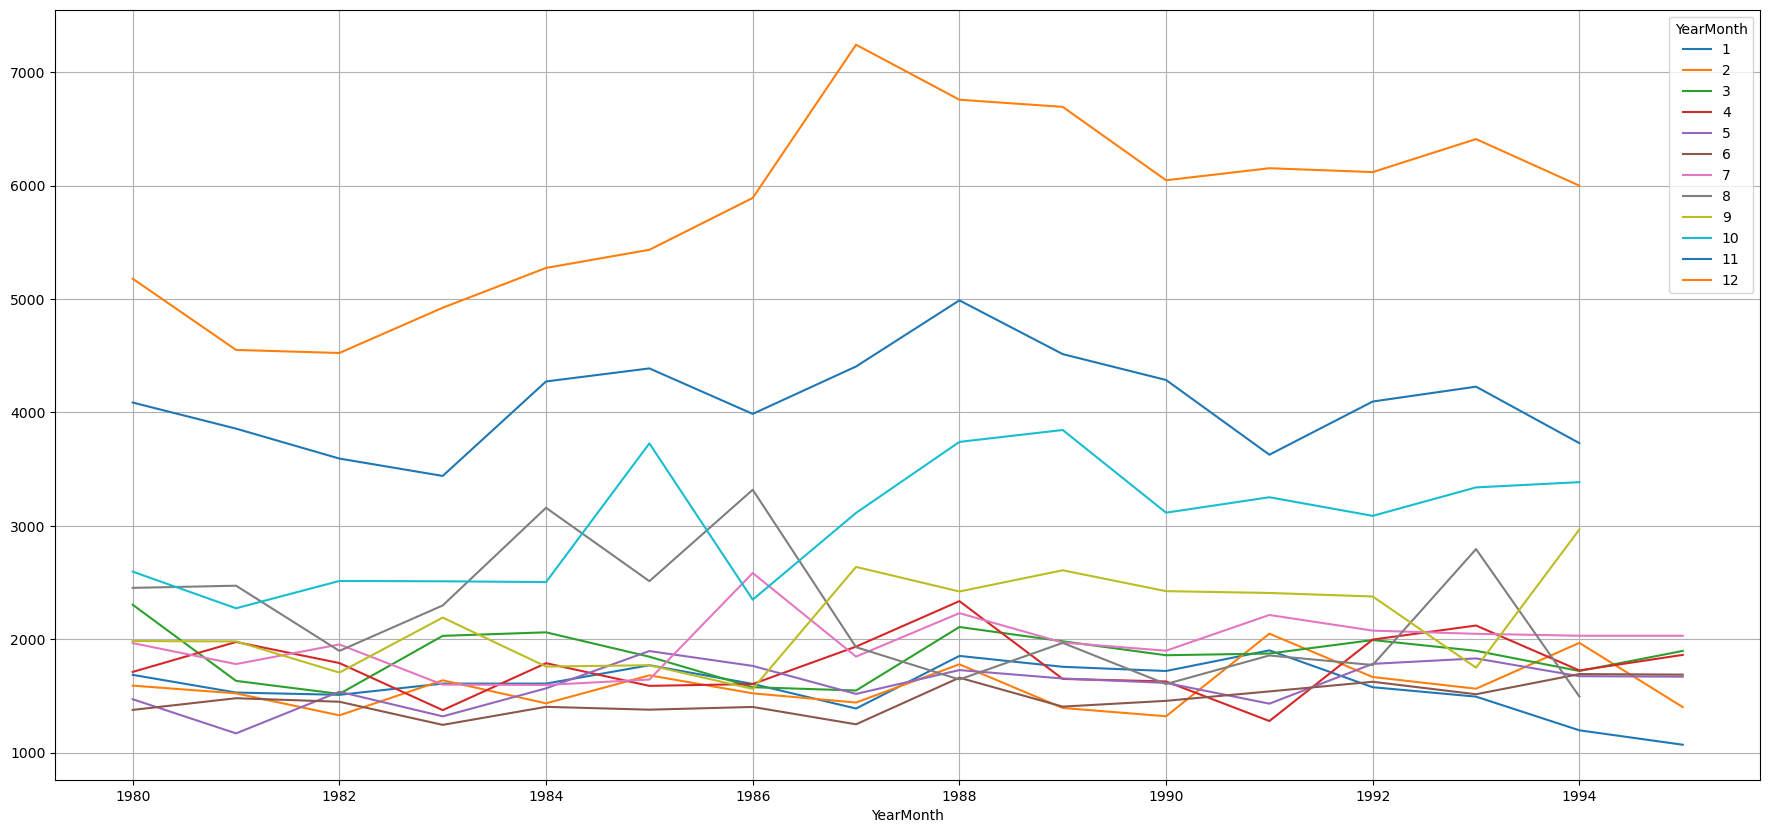

In [14]:
#plot of yearly_sales_across_months
fig,ax=plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

sale in december is highest the the rest of the year

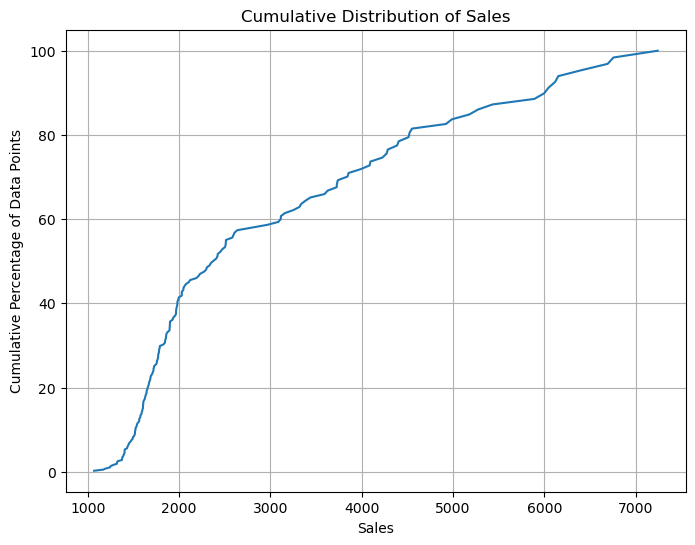

In [15]:
df_sorted = df_1.sort_values(by='Sparkling')

# Calculate cumulative distribution
total_sales = df_sorted['Sparkling'].sum()
df_sorted['Cumulative_Percentage'] = (df_sorted['Sparkling'].cumsum() / total_sales) * 100

# Plot the cumulative distribution
plt.figure(figsize=(8, 6))
plt.plot(df_sorted['Sparkling'], df_sorted['Cumulative_Percentage'])
plt.title('Cumulative Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Cumulative Percentage of Data Points')
plt.grid(True)
plt.show()

cumulative graph  tells us what percentage of data points refer to what number of sales

###### Perform Decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

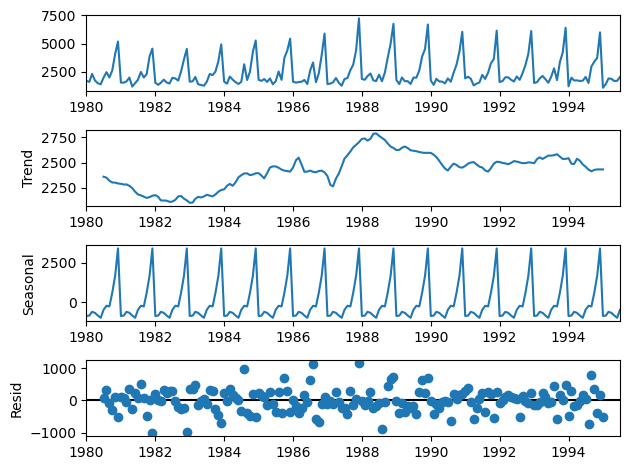

In [17]:
#additive decomposition
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

Strong Seasonality is present

 Trend  is fluctuating

In [18]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [19]:
print("trend--------------------------------")
print(trend.head())
print("seasonality---------------------------------")
print(seasonality.head())
print("residual------------------------------------")
print(residual.head())

trend--------------------------------
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64
seasonality---------------------------------
YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
Name: seasonal, dtype: float64
residual------------------------------------
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64


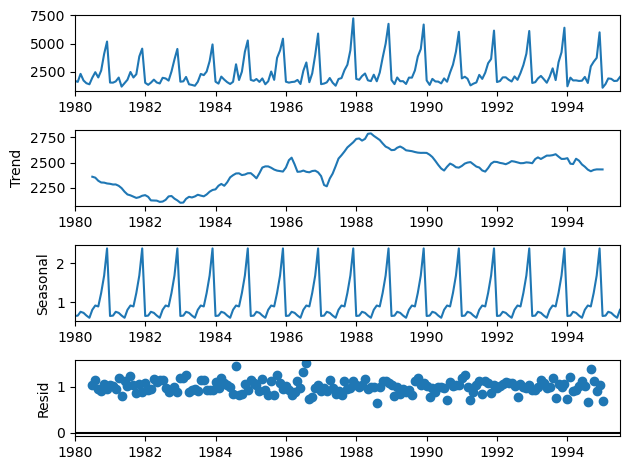

In [20]:
#multiplicative  decomposition
decomposition = seasonal_decompose(df_1,model='multiplicative')
decomposition.plot();

for all residuals are locate around 1

In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [22]:
print("trend--------------------------")
print(trend.head())
print("seasonality------------------------")
print(seasonality.head())
print("residual-------------------------------")
print(residual.head())

trend--------------------------
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64
seasonality------------------------
YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
Name: seasonal, dtype: float64
residual-------------------------------
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64


## QUESTION-2

### Data Pre-processing
###### - Missing value treatment - Visualize the processed data - Train-test split

In [23]:
#Missing value treatment

In [24]:
#checking missing value
df_1.isnull().sum()

Sparkling    0
dtype: int64

* no missing value

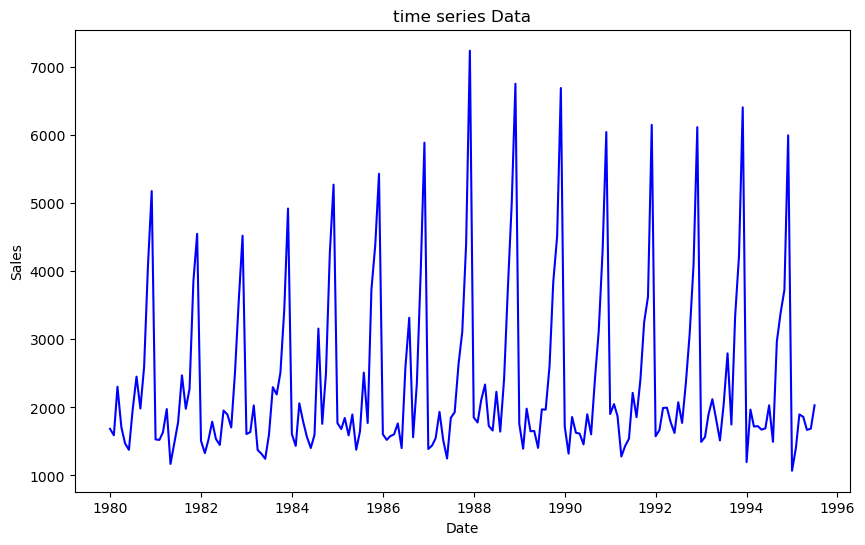

In [25]:
# Visualize the Processed Data
plt.figure(figsize=(10, 6))
plt.plot(df_1.index, df_1['Sparkling'], color='blue')
plt.title('time series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [26]:
#Train-test split

In [27]:
train=df_1[:int(len(df_1)*0.7)]
test     =   df_1[int(len(df_1)*0.7):]

In [28]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-06-01       1457
1990-07-01       1899
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116

First few rows of Test Data


Sparkling
YearMonth            
1990-11-01       4286
1990-12-01       6047
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [29]:
#shape of Train,Test
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


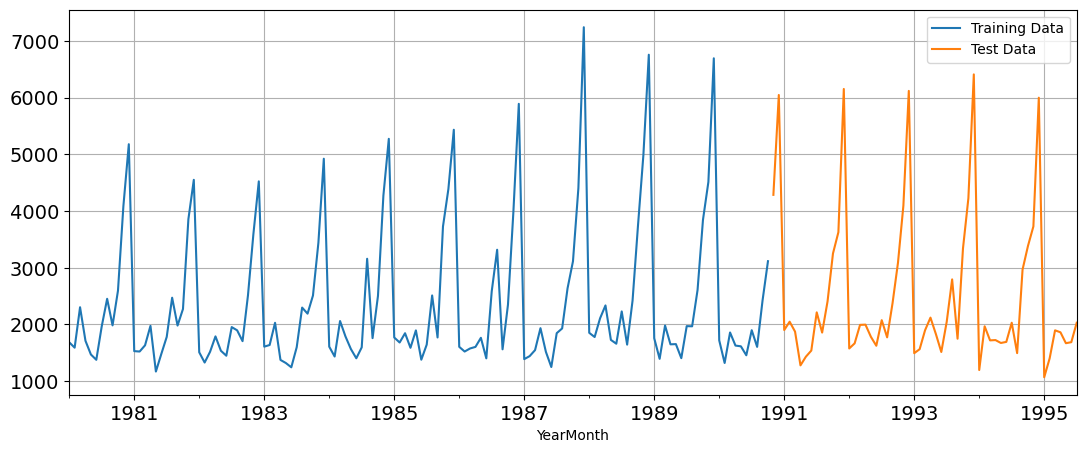

In [30]:
#plot train,test data
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### QUESTION- 3

### Model Building - Original Data
#### - Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple) - Check the performance of the models built

####  ANSWER

In [31]:
#Build forecasting models

### Linear regression model 

For this particular linear regression, we are going to regress the 'Sparkling ' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.¶

In [32]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+131 for i in range(len(test))]

In [33]:
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [34]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [35]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-06-01       1457   126
1990-07-01       1899   127
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1990-11-01       4286   131
1990-12-01       6047   132
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
  to build the model on the training data and test the model on the test data.

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [39]:
test_pred_lr=lr.predict(LinearRegression_test[['time']])
LinearRegression_test["RegOnTime"] =test_pred_lr

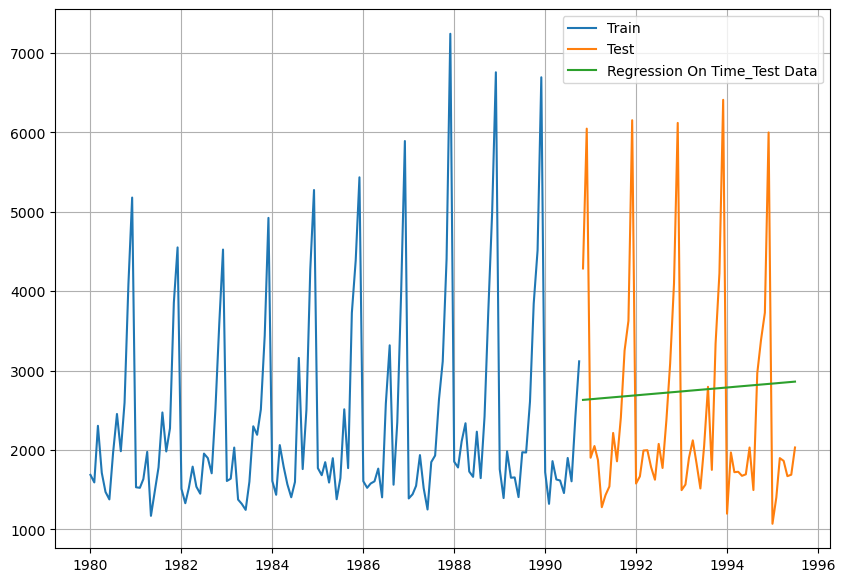

In [40]:
#plot linear Regression On Time_Test Data
plt.figure(figsize=(10,7))
plt.plot(train["Sparkling"],label="Train")
plt.plot(test["Sparkling"],label="Test")
plt.plot(LinearRegression_test["RegOnTime"],label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [41]:
#Defining the accuracy metrics.
from sklearn import metrics

In [42]:
## Test Data - RMSE

In [43]:
rmse_lr_test=metrics.mean_squared_error(test["Sparkling"],test_pred_lr,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_lr_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1392.44


In [44]:
#Test_RMSE table
resultsDf=pd.DataFrame({"Test_RMSE":[rmse_lr_test]},index=["Linear_Regression"])
resultsDf

Test_RMSE
Linear_Regression  1392.438305

### Simple Average 

For this particular simple average method, we will forecast by using the average of the training values.


In [45]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1990-11-01       4286    2361.276923
1990-12-01       6047    2361.276923
1991-01-01       1902    2361.276923
1991-02-01       2049    2361.276923
1991-03-01       1874    2361.276923

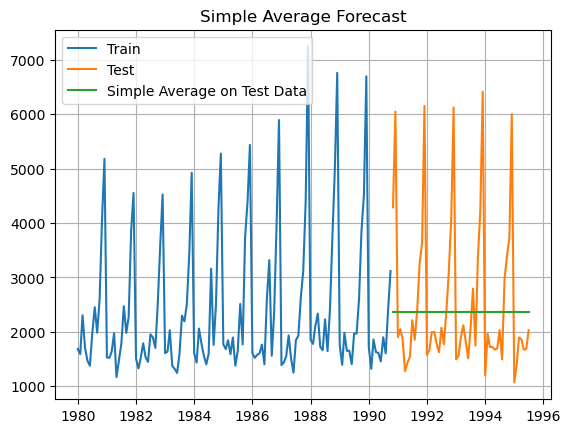

In [46]:
# Simple Average on Test Data
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [47]:
rmse_simple_avg_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_avg_test))

For Simple Average forecast on the Test Data,  RMSE is 1368.747


In [48]:
#Test_RMSE table
resultsDf_2= pd.DataFrame({'Test_RMSE': [rmse_simple_avg_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test_RMSE
Linear_Regression   1392.438305
SimpleAverageModel  1368.746717

### Method 3: Moving Average(MA)
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [49]:
Moving_avg=df_1.copy()
Moving_avg.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [50]:
Moving_avg['Trailing_2'] = Moving_avg['Sparkling'].rolling(2).mean()
Moving_avg['Trailing_4'] = Moving_avg['Sparkling'].rolling(4).mean()
Moving_avg['Trailing_6'] = Moving_avg['Sparkling'].rolling(6).mean()
Moving_avg['Trailing_9'] =Moving_avg['Sparkling'].rolling(9).mean()

Moving_avg.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

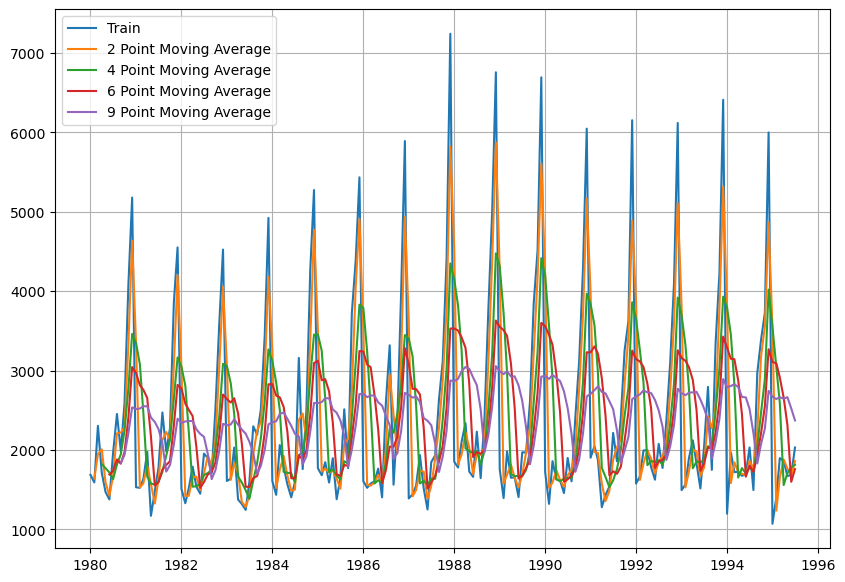

In [51]:
## Plotting on the whole data
plt.figure(figsize=(10,7))
plt.plot(Moving_avg['Sparkling'], label='Train')
plt.plot(Moving_avg['Trailing_2'], label='2 Point Moving Average')
plt.plot(Moving_avg['Trailing_4'], label='4 Point Moving Average')
plt.plot(Moving_avg['Trailing_6'],label = '6 Point Moving Average')
plt.plot(Moving_avg['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [52]:
#Creating train and test set 
trailing_Moving_avg_train=Moving_avg[0:int(len(Moving_avg)*0.7)] 
trailing_Moving_avg_test=Moving_avg[int(len(Moving_avg)*0.7):]

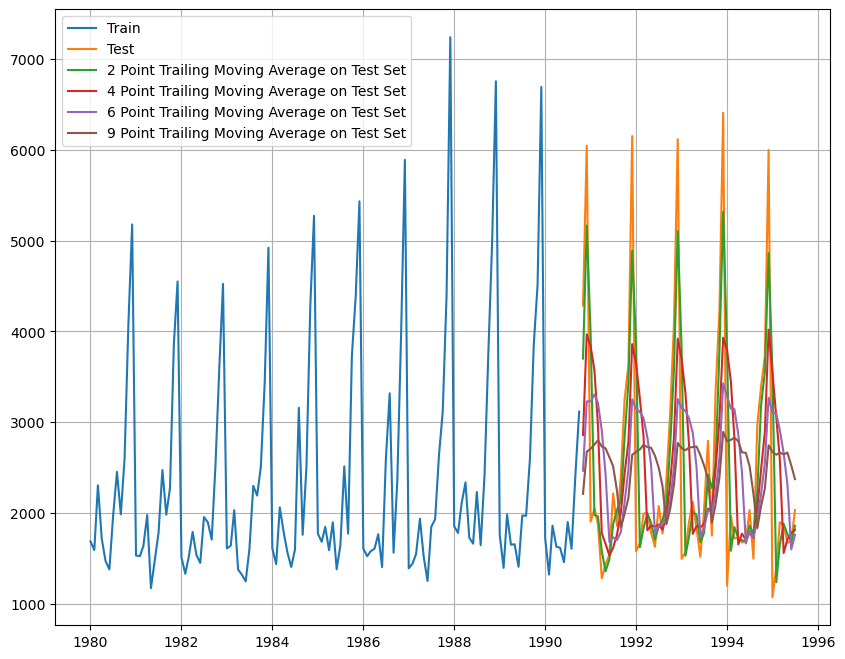

In [53]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,8))
plt.plot(trailing_Moving_avg_train['Sparkling'], label='Train')
plt.plot(trailing_Moving_avg_test['Sparkling'], label='Test')


plt.plot(trailing_Moving_avg_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Moving_avg_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Moving_avg_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Moving_avg_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

###### Model Evaluation
Done only on the test data.

In [54]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_mvg_avg_test_2= metrics.mean_squared_error(test['Sparkling'],trailing_Moving_avg_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_mvg_avg_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_mvg_avg_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_Moving_avg_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_mvg_avg_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_mvg_avg_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_Moving_avg_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_mvg_avg_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_mvg_avg_test_9= metrics.mean_squared_error(test['Sparkling'],trailing_Moving_avg_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_mvg_avg_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653


In [55]:
#Test_RMSE table
resultsDf_3= pd.DataFrame({'Test_RMSE': [rmse_mvg_avg_test_2,rmse_mvg_avg_test_4,rmse_mvg_avg_test_6,rmse_mvg_avg_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test_RMSE
Linear_Regression            1392.438305
SimpleAverageModel           1368.746717
2pointTrailingMovingAverage   811.178937
4pointTrailingMovingAverage  1184.213295
6pointTrailingMovingAverage  1337.200524
9pointTrailingMovingAverage  1422.653281

### Exponential Models (Single, Double, Triple) 

###### Single Exponential Smoothing Model

In [56]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [57]:
SES_train=train.copy()
SES_test=test.copy()

In [58]:
#build SimpleExpSmoothing model
model_SES=SimpleExpSmoothing(SES_train["Sparkling"])

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
model_SES_autofit=model_SES.fit(optimized=True)

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [60]:
#summary of SimpleExpSmoothing model
model_SES_autofit.params

{'smoothing_level': 0.038003793841186226,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2173.270438527576,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [61]:
#forcast model
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
YearMonth                         
1990-11-01       4286  2468.649492
1990-12-01       6047  2468.649492
1991-01-01       1902  2468.649492
1991-02-01       2049  2468.649492
1991-03-01       1874  2468.649492

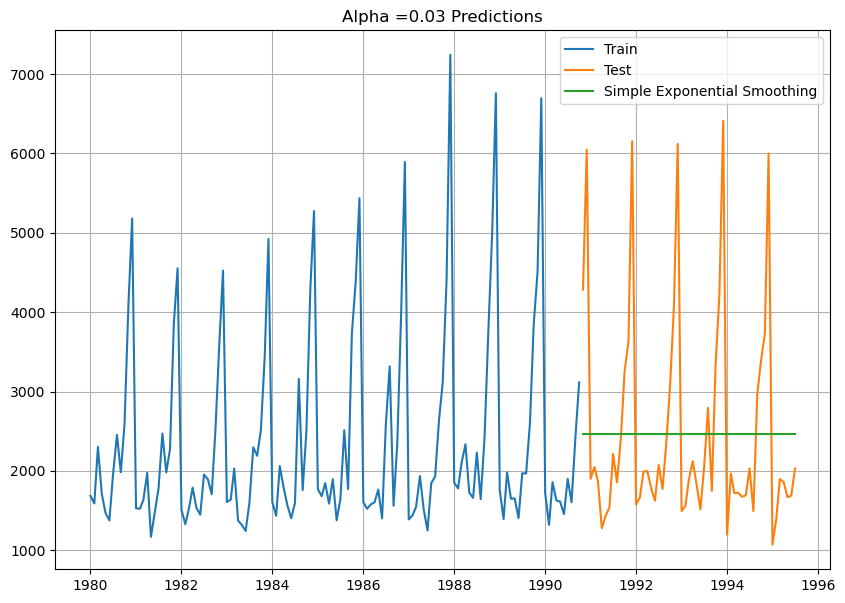

In [62]:
#Simple Exponential Smoothing plot
plt.figure(figsize=(10,7))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(SES_test["predict"],label="Simple Exponential Smoothing")
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.03 Predictions');

In [63]:
rmse_SES_test = metrics.mean_squared_error(SES_test["Sparkling"],SES_test['predict'],squared=False)
print("For Alpha =0.03 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES_test))


For Alpha =0.03 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1362.356


In [64]:
#Test_RMSE table
resultsDf_4= pd.DataFrame({'Test_RMSE': [rmse_SES_test]},index=['Alpha=0.03,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test_RMSE
Linear_Regression                      1392.438305
SimpleAverageModel                     1368.746717
2pointTrailingMovingAverage             811.178937
4pointTrailingMovingAverage            1184.213295
6pointTrailingMovingAverage            1337.200524
9pointTrailingMovingAverage            1422.653281
Alpha=0.03,SimpleExponentialSmoothing  1362.355524

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.¶

In [65]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []}) 
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [66]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=57)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\702874641.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\702874641.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\702874641.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\702874641.py:10: FutureWarning: The frame.append method is deprecated and will be removed fr

In [67]:
#Model Evaluation

In [68]:
#sort by Test rmse value
resultsDf_6.sort_values(by=["Test RMSE"],ascending=True)

Alpha Values   Train RMSE    Test RMSE
1           0.4  1329.814823  1363.037803
2           0.5  1326.403864  1364.863549
0           0.3  1331.102204  1372.323705
3           0.6  1325.588422  1379.988733
4           0.7  1329.257530  1404.659104
5           0.8  1337.879425  1434.578214
6           0.9  1351.645478  1466.179706

Alpha=0.4 have less Test RMSE

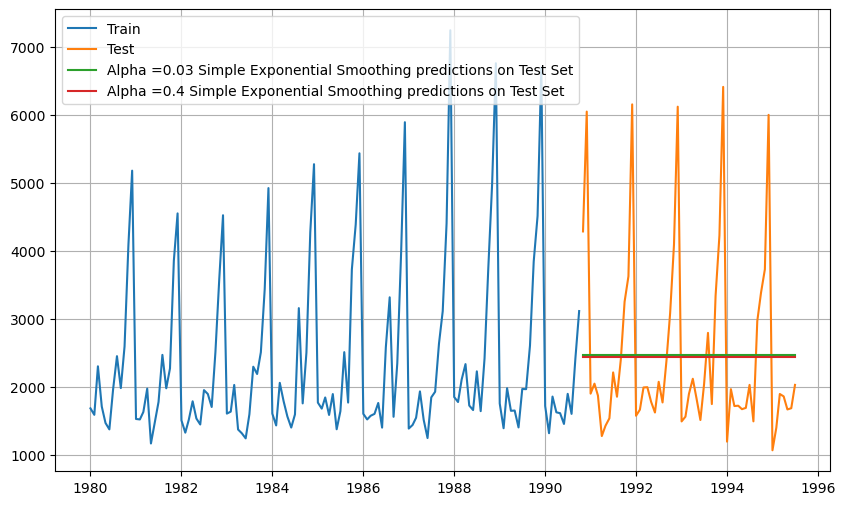

In [69]:
## Plotting Simple Exponential Smoothing  model 

plt.figure(figsize=(10,6))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.03 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [70]:
#Test_RMSE table
resultsDf_6_1 = pd.DataFrame({'Test_RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test_RMSE
Linear_Regression                      1392.438305
SimpleAverageModel                     1368.746717
2pointTrailingMovingAverage             811.178937
4pointTrailingMovingAverage            1184.213295
6pointTrailingMovingAverage            1337.200524
9pointTrailingMovingAverage            1422.653281
Alpha=0.03,SimpleExponentialSmoothing  1362.355524
Alpha=0.4,SimpleExponentialSmoothing   1363.037803

######  Double Exponential Smoothing (Holt's Model)
Two parameters  𝛼
  and  𝛽
  are estimated in this model. Level and Trend are accounted for in this model

In [71]:
DES_train = train.copy()
DES_test = test.copy()

In [72]:
#build model
model_DES = Holt(DES_train['Sparkling'])

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7


Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [74]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=57)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\934673003.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\934673003.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\934673003.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\934673003.py:11: FutureWarning: The frame.append m

In [75]:
#sort values by test_rmse
resultsDf_7 .sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1567.524066   1597.853999
1            0.3          0.4  1662.549225   4023.672164
8            0.4          0.3  1556.795694   5049.478887
16           0.5          0.3  1525.615506   7817.569799
2            0.3          0.5  1758.543876   8879.172380
..           ...          ...          ...           ...
39           0.7          1.0  1829.175506  26841.074837
47           0.8          1.0  1885.669827  27176.057077
5            0.3          0.8  1925.999079  29603.277989
7            0.3          1.0  1883.511575  33015.522624
6            0.3          0.9  1915.332971  33043.719889

[64 rows x 4 columns]

Alpha=0.3,beta=0.3 have low test RMSE

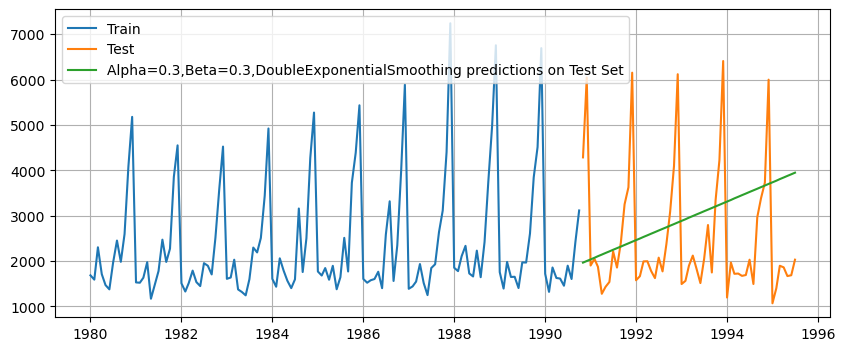

In [76]:
##DoubleExponentialSmoothing

plt.figure(figsize=(10,4))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [77]:
#Test_RMSE table
resultsDf_7_1 = pd.DataFrame({'Test_RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test_RMSE
Linear_Regression                              1392.438305
SimpleAverageModel                             1368.746717
2pointTrailingMovingAverage                     811.178937
4pointTrailingMovingAverage                    1184.213295
6pointTrailingMovingAverage                    1337.200524
9pointTrailingMovingAverage                    1422.653281
Alpha=0.03,SimpleExponentialSmoothing          1362.355524
Alpha=0.4,SimpleExponentialSmoothing           1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  1597.853999

### Triple Exponential Smoothing (Holt - Winter's Model)
Three parameters  𝛼
 ,  𝛽
  and  𝛾
  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.¶

In [78]:
TES_train = train.copy()
TES_test = test.copy()

In [79]:
#build model
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [80]:
model_TES_autofit=model_TES.fit()

In [81]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1990-11-01       4286   4327.606504
1990-12-01       6047   6208.854292
1991-01-01       1902   1621.602282
1991-02-01       2049   1379.868255
1991-03-01       1874   1791.914776

In [82]:
#summary of TES
model_TES_autofit.params

{'smoothing_level': 0.07571432471504627,
 'smoothing_trend': 0.06489794789923221,
 'smoothing_seasonal': 0.3765611795178487,
 'damping_trend': nan,
 'initial_level': 2356.5416847960546,
 'initial_trend': -9.182360270735833,
 'initial_seasons': array([0.71216394, 0.67829895, 0.89649052, 0.79723125, 0.64100433,
        0.63985644, 0.86674058, 1.1133546 , 0.89819179, 1.18511974,
        1.83459596, 2.32779881]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

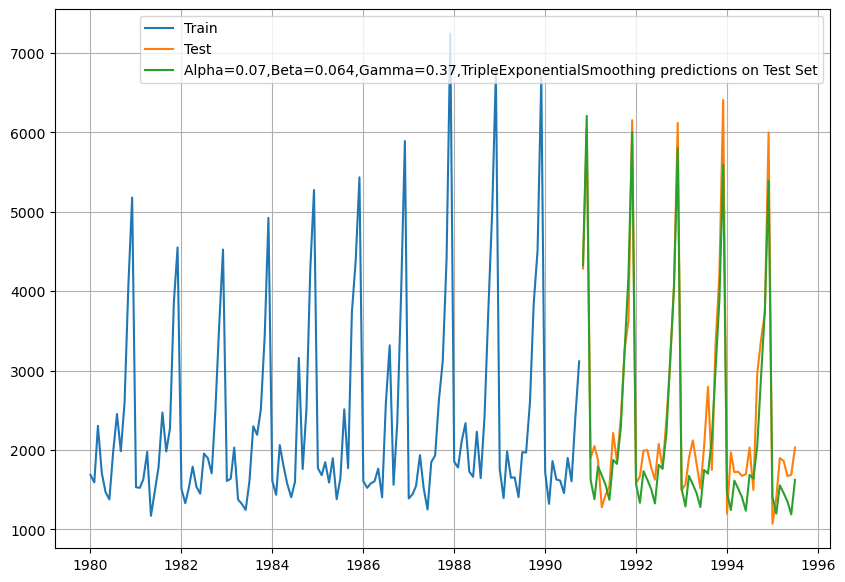

In [83]:
#TripleExponentialSmoothing model
plt.figure(figsize=(10,7))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.07,Beta=0.064,Gamma=0.37,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [84]:
rmse_TES_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.07,Beta=0.064,Gamma=0.37, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_TES_test_1))

For Alpha=0.07,Beta=0.064,Gamma=0.37, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 381.655


In [85]:
#rmse Table
resultsDf_8= pd.DataFrame({'Test_RMSE': [rmse_TES_test_1]}
                           ,index=['Alpha=0.07,Beta=0.064,Gamma=0.37,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test_RMSE
Linear_Regression                                   1392.438305
SimpleAverageModel                                  1368.746717
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.03,SimpleExponentialSmoothing               1362.355524
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.07,Beta=0.064,Gamma=0.37,TripleExponent...   381.655272

In [86]:
#setting diferent Alpa,beta,gamma values
resultsDf_8_1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [87]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=57)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_1 = resultsDf_8_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\868923985.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_1 = resultsDf_8_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\868923985.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_1 = resultsDf_8_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\868923985.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_1 = resultsDf_8_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\868923985.py:12: FutureWarning: The frame.append method is deprecated and wil

In [88]:
#sort values by test_rmse
resultsDf_8_1.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
264           0.7          0.4           0.3  512.023844  422.908833
144           0.5          0.5           0.3  472.088500  451.601686
169           0.5          0.8           0.4  625.557444  481.151676
200           0.6          0.4           0.3  479.344459  498.796626
328           0.8          0.4           0.3  544.126424  502.371290

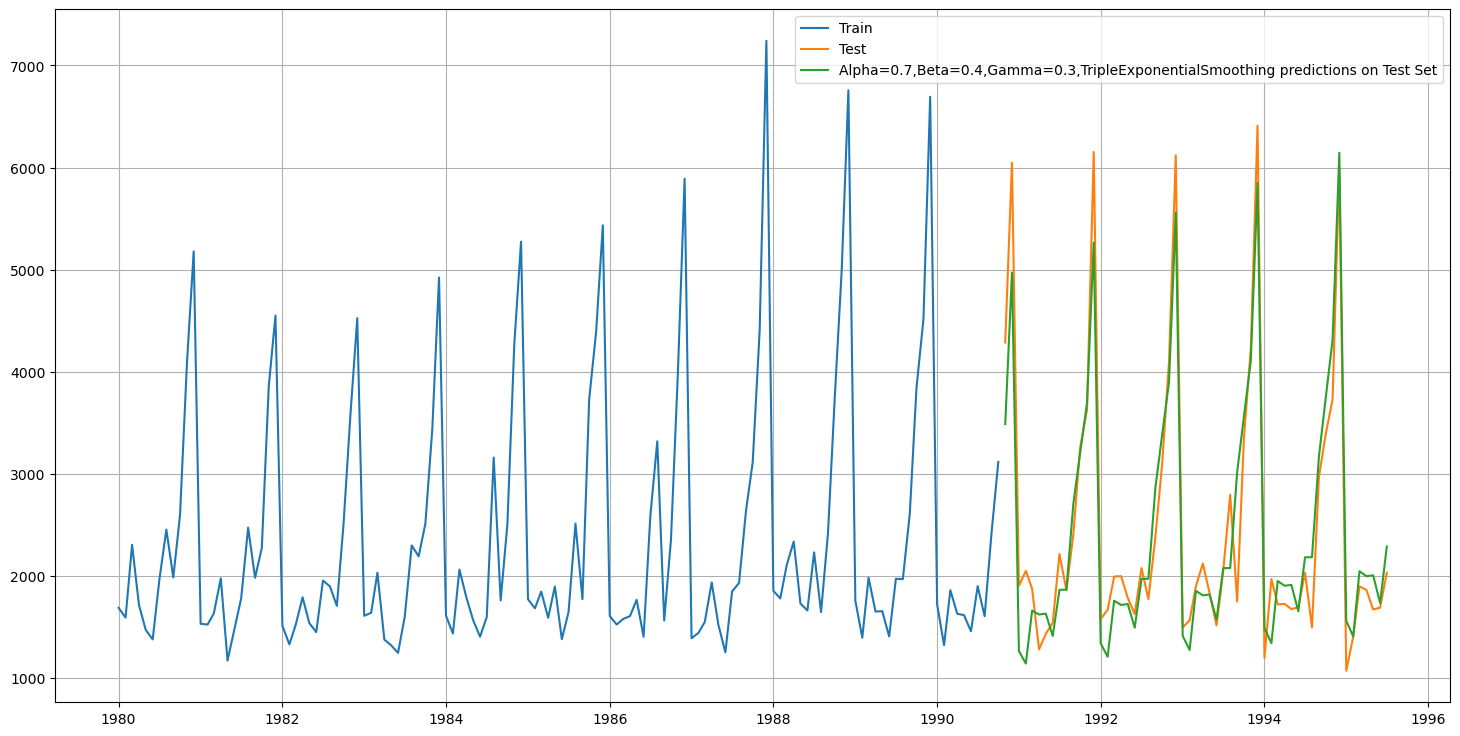

In [89]:
#TripleExponentialSmoothing
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.7000000000000002,0.4, 0.3], label='Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [90]:
#rmse Table
resultsDf_8_3 = pd.DataFrame({'Test_RMSE': [resultsDf_8_1.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test_RMSE
Linear_Regression                                   1392.438305
SimpleAverageModel                                  1368.746717
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.03,SimpleExponentialSmoothing               1362.355524
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.07,Beta=0.064,Gamma=0.37,TripleExponent...   381.655272
Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialS...   422.908833

In [91]:
#rmse table sort by rmse value
resultsDf.sort_values(by=['Test_RMSE'])

Test_RMSE
Alpha=0.07,Beta=0.064,Gamma=0.37,TripleExponent...   381.655272
Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialS...   422.908833
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
Alpha=0.03,SimpleExponentialSmoothing               1362.355524
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
SimpleAverageModel                                  1368.746717
Linear_Regression                                   1392.438305
9pointTrailingMovingAverage                         1422.653281
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999

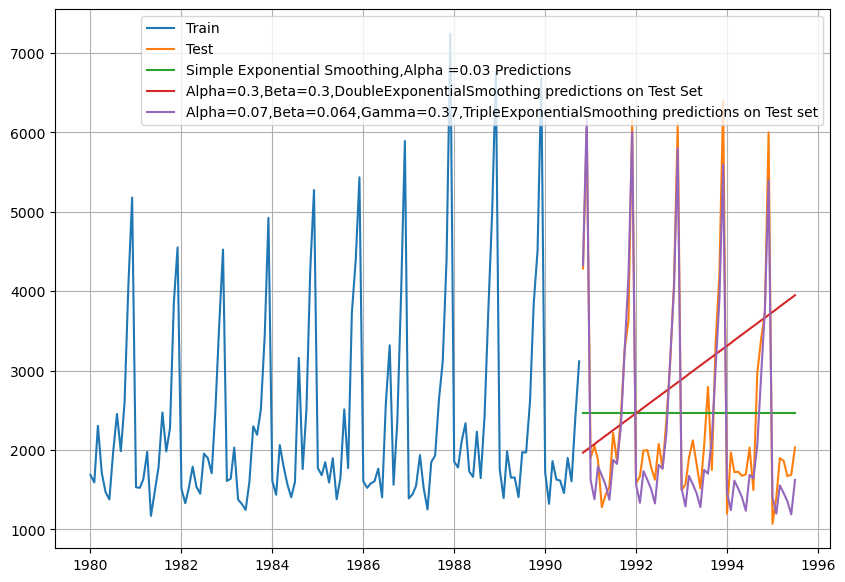

In [92]:
#plot all ExponentialSmoothing
plt.figure(figsize=(10,7))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(SES_test["predict"],label="Simple Exponential Smoothing,Alpha =0.03 Predictions")
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.07,Beta=0.064,Gamma=0.37,TripleExponentialSmoothing predictions on Test set')
plt.legend(loc='best')
plt.grid()

## QUESTION-4
#### Check for Stationarity
- Check for stationarity - Make the data stationary (if needed)

###### Dicky Fuller Test

###### H0:Time series is not stationary
###### H1:Time series is stationary    

In [93]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(time_series):
    #Determing rolling statistics
    rolmean=time_series.rolling(window=7).mean()
    rolstd=time_series.rolling(window=7).std()
    
    #Plot rolling statistics:
    orig = plt.plot(time_series, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest=adfuller(time_series, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

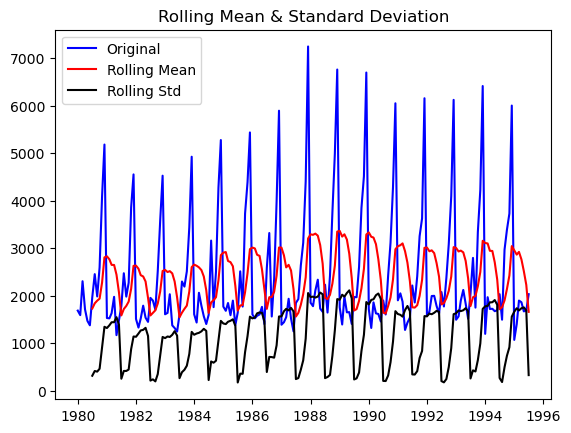

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [94]:
#checking stationarity plot of orginal data set
test_stationarity(df_1['Sparkling'])

p-value greater than 0.05 so the Time series is not stationary

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

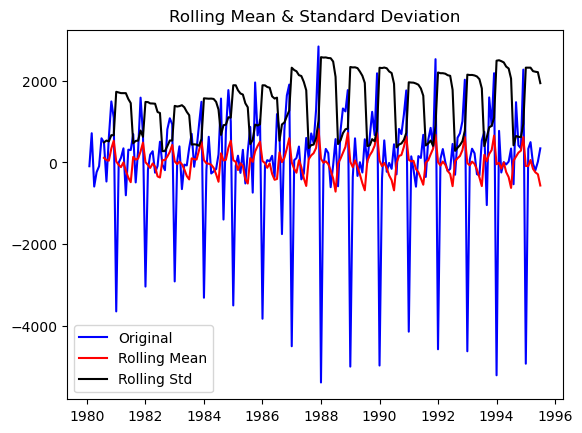

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [95]:
##checking stationarity plot of 1 difference series
test_stationarity(df_1['Sparkling'].diff().dropna())

p-value less than 0.05 so null hypothesis is reject so this time series is stationary

### QUESTION-5
##### Model Building - Stationary Data
- Generate ACF & PACF Plot and find the AR, MA values. - Build different ARIMA models - Auto ARIMA - Manual ARIMA - Build different SARIMA models - Auto SARIMA - Manual SARIMA - Check the performance of the models built

###### Generate ACF 

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

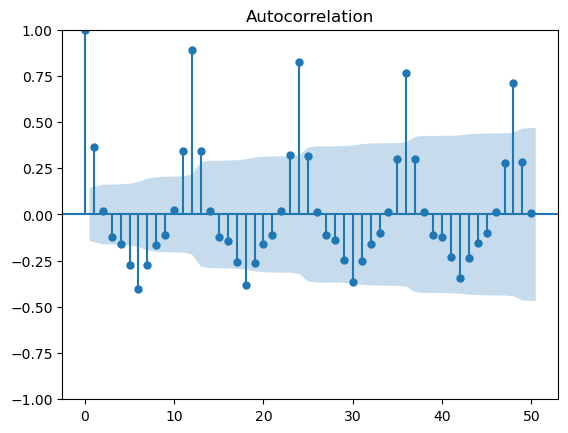

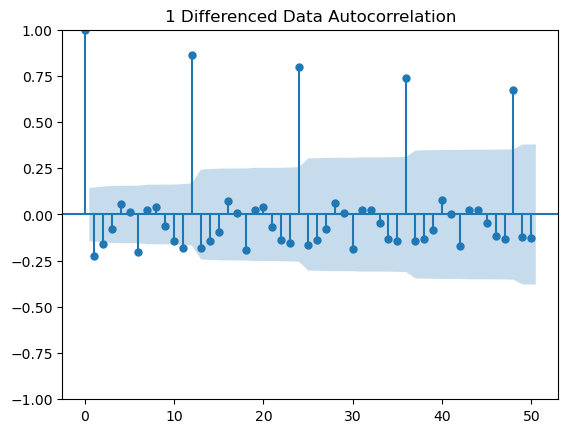

In [97]:
#plot acf,pacf
plot_acf(df_1['Sparkling'],lags=50)
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='1 Differenced Data Autocorrelation')
plt.show()

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


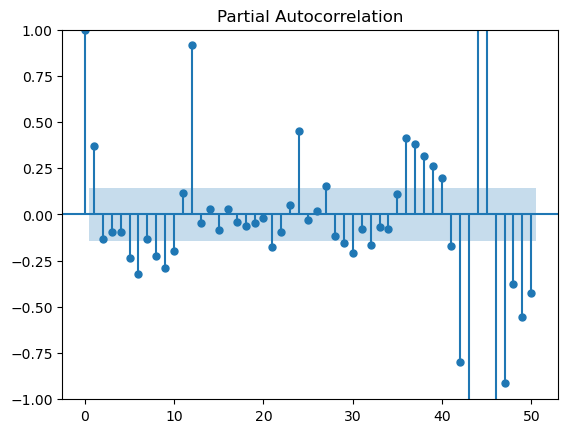

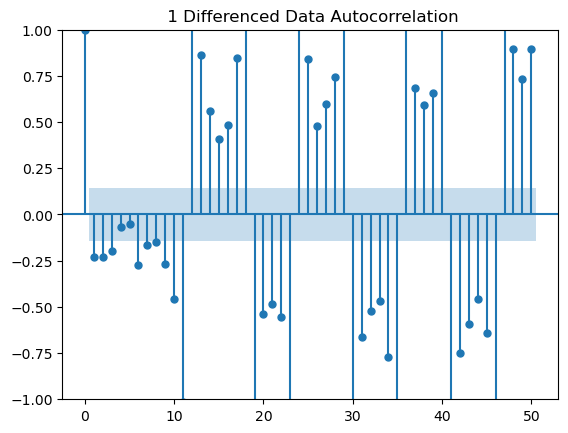

In [98]:
plot_pacf(df_1['Sparkling'],lags=50)
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title=' 1 Differenced Data Autocorrelation')
plt.show()

AR=0      (from PACF)
MA=1      (from ACF)

for 1 difference time series

AR=0  (FROM PACF)
MA=1 (FROM ACF)

##### Build different ARIMA models - Auto ARIMA - Manual ARIMA -

#Auto ARIMA

In [99]:
import itertools
p=q=range(0,3)
d= range(1,2)
pdq=list(itertools.product(p,d,q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print("model:  {}".format(pdq[i]))

Some parameter combinations for the Model...
model:  (0, 1, 1)
model:  (0, 1, 2)
model:  (1, 1, 0)
model:  (1, 1, 1)
model:  (1, 1, 2)
model:  (2, 1, 0)
model:  (2, 1, 1)
model:  (2, 1, 2)


In [100]:
ARIMA_AIC=pd.DataFrame(columns=["param","AIC"])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

#setting values

In [101]:
from statsmodels.tsa.arima.model import ARIMA
for param in pdq:
    ARIMA_MODEL=ARIMA(train["Sparkling"].values,order=param).fit()
    print("ARIMA{}-AIC:{}".format(param, ARIMA_MODEL.aic))
    ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)

ARIMA(0, 1, 0)-AIC:2232.719438106631
ARIMA(0, 1, 1)-AIC:2217.9392215777407


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2387515056.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2387515056.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


ARIMA(0, 1, 2)-AIC:2194.034361361615
ARIMA(1, 1, 0)-AIC:2231.137663012458


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2387515056.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2387515056.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)
c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1)-AIC:2196.050085997568


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2387515056.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


ARIMA(1, 1, 2)-AIC:2194.959653392053
ARIMA(2, 1, 0)-AIC:2223.899470277437


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2387515056.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2387515056.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


ARIMA(2, 1, 1)-AIC:2193.9749624358974


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2387515056.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


ARIMA(2, 1, 2)-AIC:2178.1097266792094


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2387515056.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


In [102]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2178.109727
7  (2, 1, 1)  2193.974962
2  (0, 1, 2)  2194.034361
5  (1, 1, 2)  2194.959653
4  (1, 1, 1)  2196.050086
1  (0, 1, 1)  2217.939222
6  (2, 1, 0)  2223.899470
3  (1, 1, 0)  2231.137663
0  (0, 1, 0)  2232.719438

In [103]:
#set (2,1,2) model
auto_ARIMA = ARIMA(train['Sparkling'], order=(2, 1, 2), freq="MS")


c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [104]:
results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1084.055
Date:                Sun, 21 Apr 2024   AIC                           2178.110
Time:                        21:12:52   BIC                           2192.409
Sample:                    01-01-1980   HQIC                          2183.920
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3020      0.046     28.547      0.000       1.213       1.391
ar.L2         -0.5360      0.079     -6.765      0.000      -0.691      -0.381
ma.L1         -1.9916      0.109    -18.214      0.0

In [105]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [106]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1325.1542678968494


In [107]:
#rmse table
resultsDf0 = pd.DataFrame({'Test_RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf0

Test_RMSE
ARIMA(2,1,2)  1325.154268

#### Manual ARIMA


In [108]:
#set(2,1,1)
manual_ARIMA= ARIMA(train['Sparkling'], order=(2, 1, 1), freq="MS")

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
#manual_ARIMA summary
results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1092.987
Date:                Sun, 21 Apr 2024   AIC                           2193.975
Time:                        21:12:55   BIC                           2205.414
Sample:                    01-01-1980   HQIC                          2198.623
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4862      0.104      4.660      0.000       0.282       0.691
ar.L2         -0.1764      0.190     -0.929      0.353      -0.548       0.196
ma.L1         -0.9999      0.098    -10.225      0.0

In [110]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [111]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print(rmse)

1359.6498379449822


In [112]:
resultsDf_3= pd.DataFrame({'Test_RMSE': [rmse]}
                           ,index=['manual ARIMA(2,1,1)'])


resultsDf0=pd.concat([resultsDf0,resultsDf_3])
resultsDf0

Test_RMSE
ARIMA(2,1,2)         1325.154268
manual ARIMA(2,1,1)  1359.649838

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).¶

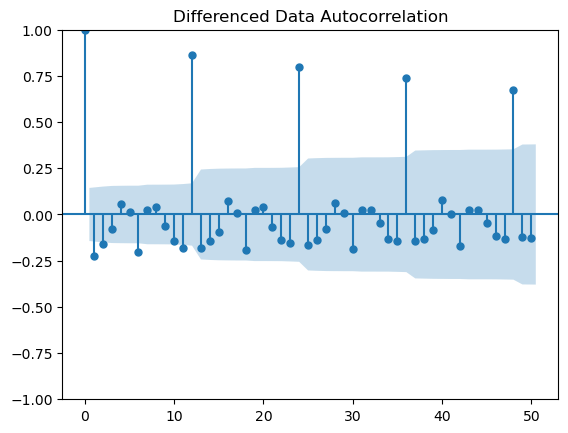

In [113]:
        plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
        plt.show()

We see that there can be a seasonality of 6 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =6 and thus using the same

##### Setting the seasonality as 6 to estimate parametrs using auto SARIMA model.

In [114]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [115]:
#setting different values
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [116]:
import statsmodels.api as sm

In [117]:
for param in pdq:
    for parm_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=parm_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, parm_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2216.4189020489616
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1921.5151801498844


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1691.5049017310976
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1807.2950161665542


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1777.6492913876366


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1601.281534210607
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1618.9670228363275


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1617.7268547329668


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1602.062365958758
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2193.281680181417


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1888.5868794008513


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1658.7576059581322


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1768.1554049142383


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1704.8427340697406


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1536.3191139350608


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1575.249693559518


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1564.9149381065015


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1536.411010133245
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2143.9209005621547


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1853.674716438678


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1624.757310552475


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1760.7216575033397


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1691.3744541840751


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1524.522125089718


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1573.2338748356217


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1566.7494024673133


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1523.7072972160424
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2214.8516264604455


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1919.1580486803139


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1689.8880118556967


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1782.024250138347


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1759.3455844991136


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1587.2527635497665


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1593.015124187761


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1587.7818267352864


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1587.0474358182623
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2165.914890109132


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1872.2057291078409


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1645.119035211755


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1746.0411803412817


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1706.6940980082393


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1537.9253340950597
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1560.2276828197046


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1552.2403936956653


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1538.0472362362943


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2145.0969765927966


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1855.5409901543958


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1626.6068224318342


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1741.939708760783


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1690.7620851584074


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1526.1482232821686


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1562.2382505165879


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1551.3914065831564


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1521.7379550255532
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2190.8338694577515


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1913.107023045554


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1678.6510971328044


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1751.4274988003995


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1726.338133900166


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1570.2465435892427


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1563.2068573875492


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1556.407845021267


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1554.951253385322


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2160.2483044779


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1870.9922931385008


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1642.5176683267248


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1730.2218368538113


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1706.7535525260807


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1538.345097493133


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1546.7290693790144


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1538.7173774511689


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1538.2657002089788


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2140.6693960014036


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1857.4627148532304


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1631.3963012278175


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1727.5761548970236


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1691.6106392736092


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1523.5249458580122


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1545.387546985494


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1539.0422082396763


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1523.2178331168238


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3714483348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [118]:
#sort values by AIC of SARIMA
SARIMA_AIC.sort_values(by="AIC",ascending=True)

param       seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 12)  1521.737955
80  (2, 1, 2)  (2, 0, 2, 12)  1523.217833
77  (2, 1, 2)  (1, 0, 2, 12)  1523.524946
26  (0, 1, 2)  (2, 0, 2, 12)  1523.707297
23  (0, 1, 2)  (1, 0, 2, 12)  1524.522125
..        ...            ...          ...
36  (1, 1, 1)  (0, 0, 0, 12)  2165.914890
54  (2, 1, 0)  (0, 0, 0, 12)  2190.833869
9   (0, 1, 1)  (0, 0, 0, 12)  2193.281680
27  (1, 1, 0)  (0, 0, 0, 12)  2214.851626
0   (0, 1, 0)  (0, 0, 0, 12)  2216.418902

[81 rows x 3 columns]

In [119]:
#auto_SARIMA summary
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -839.175
Date:                           Sun, 21 Apr 2024   AIC                           1694.351
Time:                                   21:15:20   BIC                           1716.240
Sample:                                        0   HQIC                          1703.235
                                           - 130                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6517      0.277     -2.349      0.019      -1.195      -0.108
ma.L1         -0.1335      0.241     -0.554

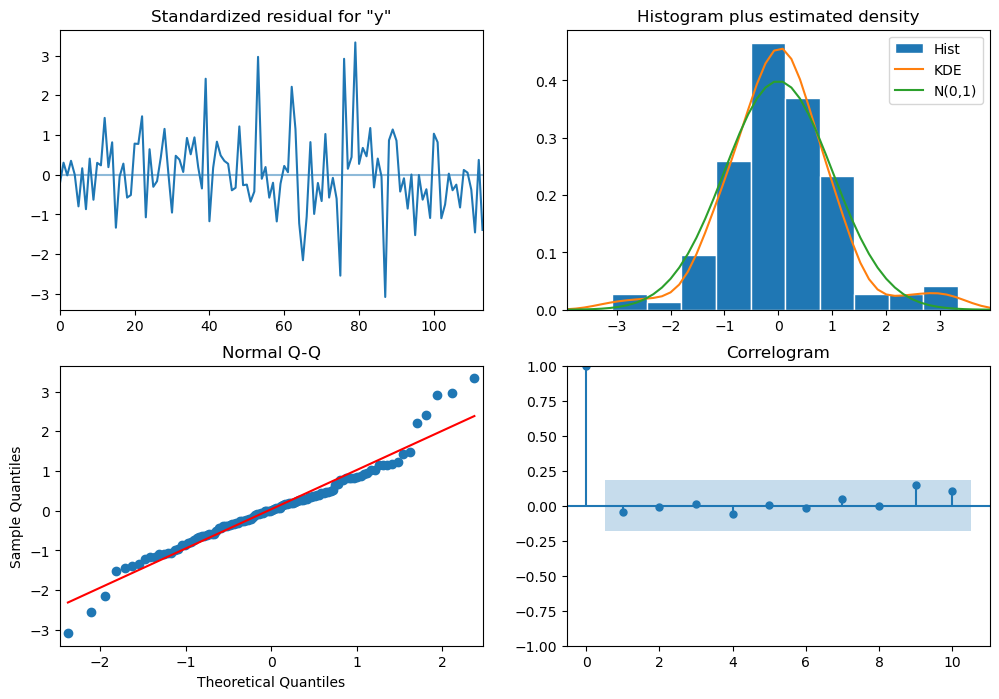

In [120]:
#diagnostics plot of SARIMA
results_auto_SARIMA_6.plot_diagnostics(figsize=(12, 8))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

#### Predict on the Test Set using this model and evaluate the model.

In [121]:
predicted_auto_SARIMA_6 =results_auto_SARIMA_6.get_forecast(steps=len(test))

In [122]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  4672.709251  373.039086    3941.566077    5403.852424
1  7093.670708  381.548387    6345.849612    7841.491805
2  1539.952786  381.550368     792.127806    2287.777766
3  1257.122908  385.158309     502.226493    2012.019323
4  1806.925454  385.631633    1051.101342    2562.749566

In [123]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

642.8246418918768


In [124]:
#rmse tale
temp_resultsDf = pd.DataFrame({'Test_RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf0 = pd.concat([resultsDf0,temp_resultsDf])

resultsDf0

Test_RMSE
ARIMA(2,1,2)            1325.154268
manual ARIMA(2,1,1)     1359.649838
SARIMA(1,1,2)(2,0,2,6)   642.824642

#### manual_SARIMA

In [125]:
#manual_SARIMA.summary
manual_SARIMA_6= sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6= manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  130
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -840.420
Date:                           Sun, 21 Apr 2024   AIC                           1694.840
Time:                                   21:15:24   BIC                           1713.993
Sample:                                        0   HQIC                          1702.613
                                           - 130                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8398      0.102     -8.223      0.000      -1.040      -0.640
ma.L2         -0.0691      0.104     -0.662

In [126]:
predicted_manual_SARIMA_6 =results_manual_SARIMA_6.get_forecast(steps=len(test))

In [127]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  4756.021732  376.544905    4018.007280    5494.036183
1  7041.957045  381.348431    6294.527856    7789.386235
2  1568.982872  382.890365     818.531546    2319.434198
3  1246.209239  384.426018     492.748088    1999.670389
4  1805.400485  385.945857    1048.960506    2561.840464

In [128]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

646.8865073481762


In [129]:
temp_resultsDf = pd.DataFrame({'Test_RMSE': [rmse]}
                           ,index=['manual SARIMA(0,1,2)(2,0,2,6)'])


resultsDf0 = pd.concat([resultsDf0,temp_resultsDf])

resultsDf0

Test_RMSE
ARIMA(2,1,2)                   1325.154268
manual ARIMA(2,1,1)            1359.649838
SARIMA(1,1,2)(2,0,2,6)          642.824642
manual SARIMA(0,1,2)(2,0,2,6)   646.886507

### 6- Compare the performance of the models
- Compare the performance of all the models built - Choose the best model with proper rationale - Rebuild the best model using the entire data - Make a forecast for the next 12 months

In [130]:
resultsDf0

Test_RMSE
ARIMA(2,1,2)                   1325.154268
manual ARIMA(2,1,1)            1359.649838
SARIMA(1,1,2)(2,0,2,6)          642.824642
manual SARIMA(0,1,2)(2,0,2,6)   646.886507

In [131]:
resultsDf=pd.concat([resultsDf,resultsDf0])

In [132]:
#rmse Table
resultsDf

Test_RMSE
Linear_Regression                                   1392.438305
SimpleAverageModel                                  1368.746717
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.03,SimpleExponentialSmoothing               1362.355524
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.07,Beta=0.064,Gamma=0.37,TripleExponent...   381.655272
Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialS...   422.908833
ARIMA(2,1,2)                                        1325.154268
manual ARIMA(2,1,1)                                 1359.649838
SARIMA(1,1,2)(2,0,2,6)                               642.824642
manual SARIMA(0,1,2)(2,0,2,6)                        646.886507

In [133]:

#rmse tale sort by test rmse value
resultsDf.sort_values(by="Test_RMSE",ascending=True)

Test_RMSE
Alpha=0.07,Beta=0.064,Gamma=0.37,TripleExponent...   381.655272
Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialS...   422.908833
SARIMA(1,1,2)(2,0,2,6)                               642.824642
manual SARIMA(0,1,2)(2,0,2,6)                        646.886507
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
ARIMA(2,1,2)                                        1325.154268
6pointTrailingMovingAverage                         1337.200524
manual ARIMA(2,1,1)                                 1359.649838
Alpha=0.03,SimpleExponentialSmoothing               1362.355524
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
SimpleAverageModel                                  1368.746717
Linear_Regression                                   1392.438305
9pointTrailingMovingAverage                         1422.653281
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999

best model is Alpha=0.07,Beta=0.064,Gamma=0.37,TripleExponentialSmoothing	(Test_rmse value 381.655272)

##### Rebuild the best model using the entire data - Make a forecast for the next 12 months

In [134]:
#full_data_model summary
full_data_model =  sm.tsa.ExponentialSmoothing(df_1['Sparkling'],trend='additive',seasonal='multiplicative')
results_full_data_model = full_data_model.fit()
print(results_full_data_model.summary())

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                Sparkling   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       22325913.148
Optimized:                         True   AIC                           2218.058
Trend:                         Additive   BIC                           2269.756
Seasonal:                Multiplicative   AICC                          2222.129
Seasonal Periods:                    12   Date:                 Sun, 21 Apr 2024
Box-Cox:                          False   Time:                         21:15:25
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0756735                alpha                 True
smoothing_trend          


#### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [135]:
# Forecast the next 12 months
forecast_12_months = results_full_data_model.forecast(steps=12)

print("Forecast for the next 12 months:")
print(forecast_12_months)


Forecast for the next 12 months:
1995-08-01    1931.948827
1995-09-01    2351.014431
1995-10-01    3178.501530
1995-11-01    3916.626178
1995-12-01    5982.802931
1996-01-01    1356.447923
1996-02-01    1597.725021
1996-03-01    1828.530596
1996-04-01    1788.993714
1996-05-01    1639.705581
1996-06-01    1553.839348
1996-07-01    1962.350245
Freq: MS, dtype: float64


In [136]:
rmse = mean_squared_error(df_1['Sparkling'],results_full_data_model.fittedvalues,squared=False)



In [137]:
print('RMSE of the Full Model',rmse)


RMSE of the Full Model 345.52845018024107


In [138]:
#forcasted Table
forecast_df = pd.DataFrame(forecast_12_months, columns=['sale'])
forecast_df 

sale
1995-08-01  1931.948827
1995-09-01  2351.014431
1995-10-01  3178.501530
1995-11-01  3916.626178
1995-12-01  5982.802931
1996-01-01  1356.447923
1996-02-01  1597.725021
1996-03-01  1828.530596
1996-04-01  1788.993714
1996-05-01  1639.705581
1996-06-01  1553.839348
1996-07-01  1962.350245

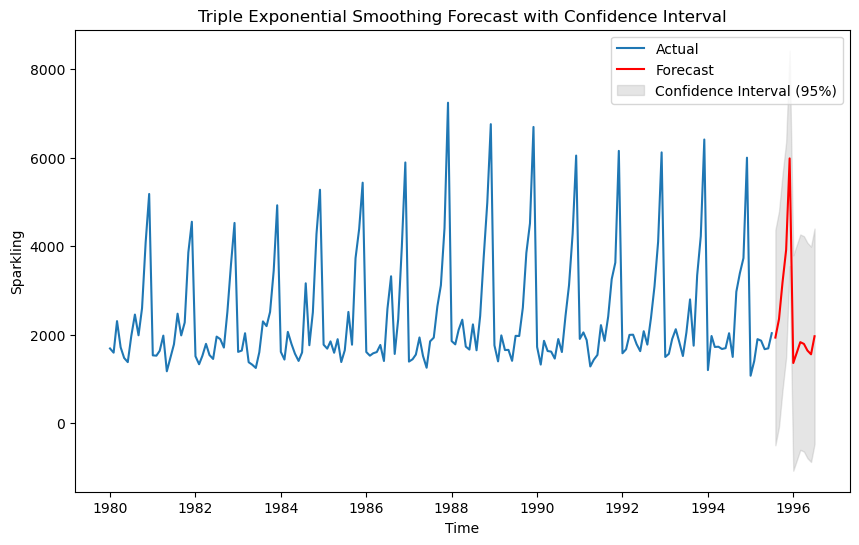

In [139]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_1['Sparkling'], label='Actual')
plt.plot(forecast_12_months, color='red', label='Forecast')
plt.fill_between(
    forecast_12_months.index,
    forecast_12_months - 1.96 * results_full_data_model.fittedvalues.std(),
    forecast_12_months + 1.96 * results_full_data_model.fittedvalues.std(),
    color='gray', alpha=0.2, label='Confidence Interval (95%)'
)
plt.legend()
plt.title('Triple Exponential Smoothing Forecast with Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Sparkling')
plt.show()

#### Actionable Insights & Recommendations
- Conclude with the key takeaways (actionable insights and recommendations) for the business

##### Inference

* for the given Sparkling data set there is not much compared to previous year.
* December month has the highest sales in a year.
* Model plot was build based on trend and seasonality.we see the future prediction is inline with the previous year prediction.

##### Recommendation

* Sparkling wine sale are seasonal 
* Company should plan a head and keep enough stock from september till december to captlize on the demand
* In order to increase the sales company should plan some promotional offers from january till june so that  there will be steady sales throughout the year

########################################################################################################################################

# Rose wine sale

### QUESTION -1

##### Define the problem and perform Exploratory Data Analysis- Read the data as an appropriate time series data - Plot the data - Perform EDA - Perform Decomposition


In [140]:
#READ DATA SET
df_2=pd.read_csv("Rose (1).csv")

In [141]:
#first 5 rows of data set
df_2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [142]:
#check data types
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [143]:
#convert YearMonth column as index,and change YearMonth column to date time type
df_2=pd.read_csv("Rose (1).csv",parse_dates=True,index_col="YearMonth")

In [144]:
#first 5 rows
df_2.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Text(0.5, 1.0, 'time series of Rose wine sale')

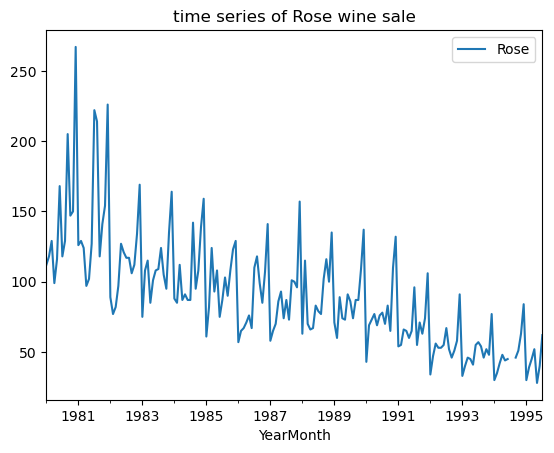

In [145]:
#time series of Rose wine sale
df_2.plot()
plt.title("time series of Rose wine sale")

we can see the trend is downward trend.

##### Perform EDA

In [146]:
#check information about the Data Set
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


this dataset have 2 missing value.

In [147]:
#check null values 
df_2.isnull().sum()

Rose    2
dtype: int64

there no null values after interploation treatment

In [148]:
missing_rows = df_2[df_2.isnull().any(axis=1)]

# Print or view the rows with missing values
print(missing_rows)

            Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN


In [149]:
## Interpolate missing values using spline interpolation
df_2['Rose'] = df_2['Rose'].interpolate(method='spline', order=3)

# Print the DataFrame with missing values removed and interpolated
print(df_2)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


In [150]:
#print statical summary of the data set
df_2.describe()

Rose
count  187.000000
mean    89.898722
std     39.256515
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

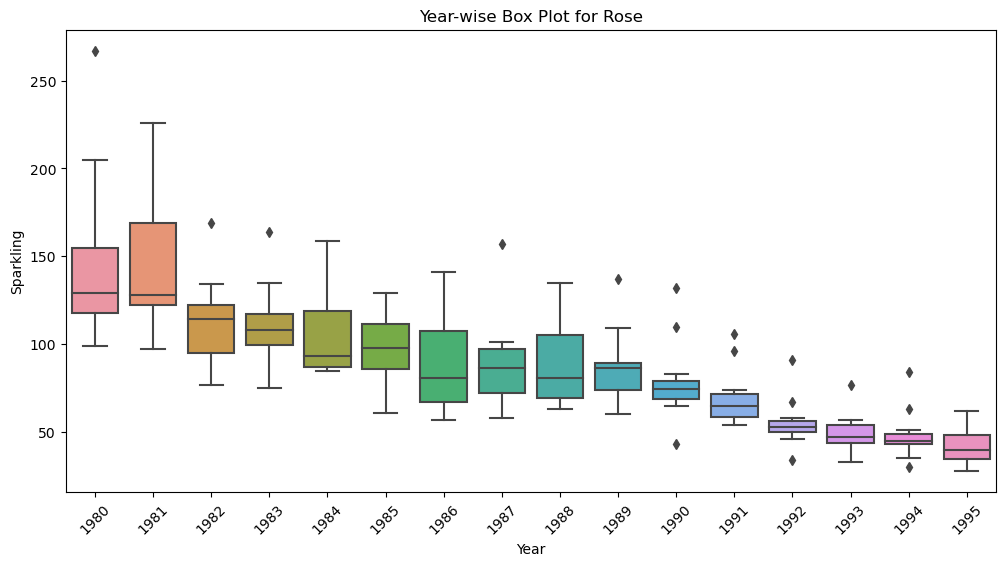

In [151]:
#Year-wise Box Plot for Rose
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2, x=df_2.index.year, y='Rose')
plt.title('Year-wise Box Plot for Rose')
plt.xlabel('Year')
plt.ylabel('Sparkling')
plt.xticks(rotation=45)
plt.show()

Sales  have decreased towards the last few years

Year 1981 seems to be having highest sales and lowest seems to be year 1994

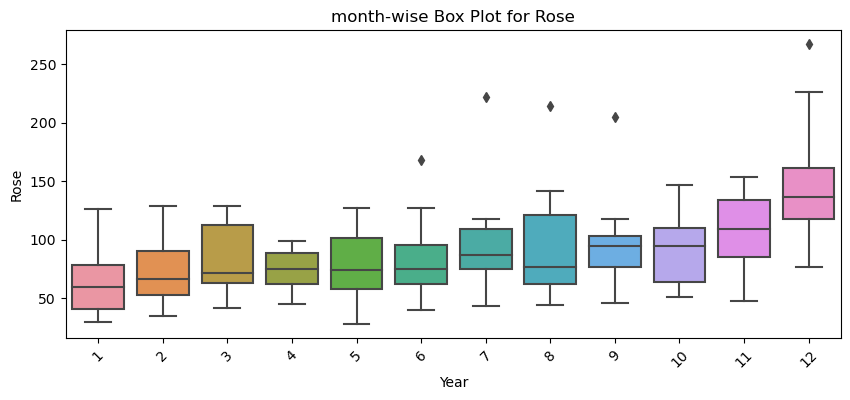

In [152]:
#month-wise Box Plot for Rose
plt.figure(figsize=(10,4))
sns.boxplot(data=df_2,x=df_2.index.month,y="Rose")
plt.title("month-wise Box Plot for Rose")
plt.xlabel('Year')
plt.ylabel('Rose')
plt.xticks(rotation=45)
plt.show()

outliers present in the dataset for month june,july,August,september and december 

december month has highest sales in a year

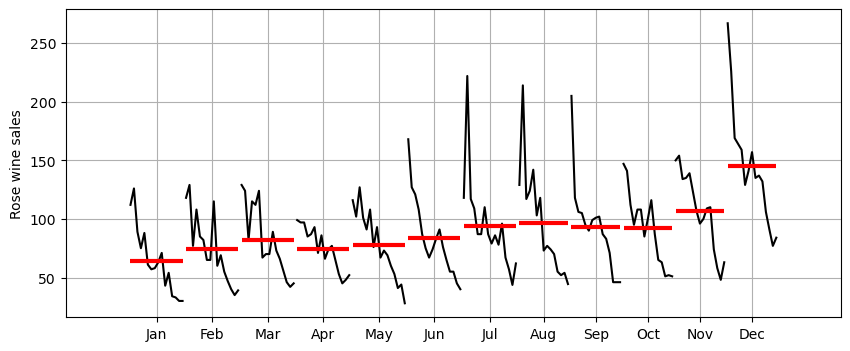

In [153]:
#month wise sale
from statsmodels.graphics.tsaplots import month_plot
fig,ax=plt.subplots(figsize=(10,4))
month_plot(df_2,ylabel="Rose wine sales",ax=ax)
plt.grid();

low sale in April

In [154]:
#pivot table yearly_sales_across_months
yearly_sales_across_months=pd.pivot_table(data=df_2,values="Rose",index=df_2.index.year,columns=df_2.index.month)
yearly_sales_across_months

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   43.656385   44.404582   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

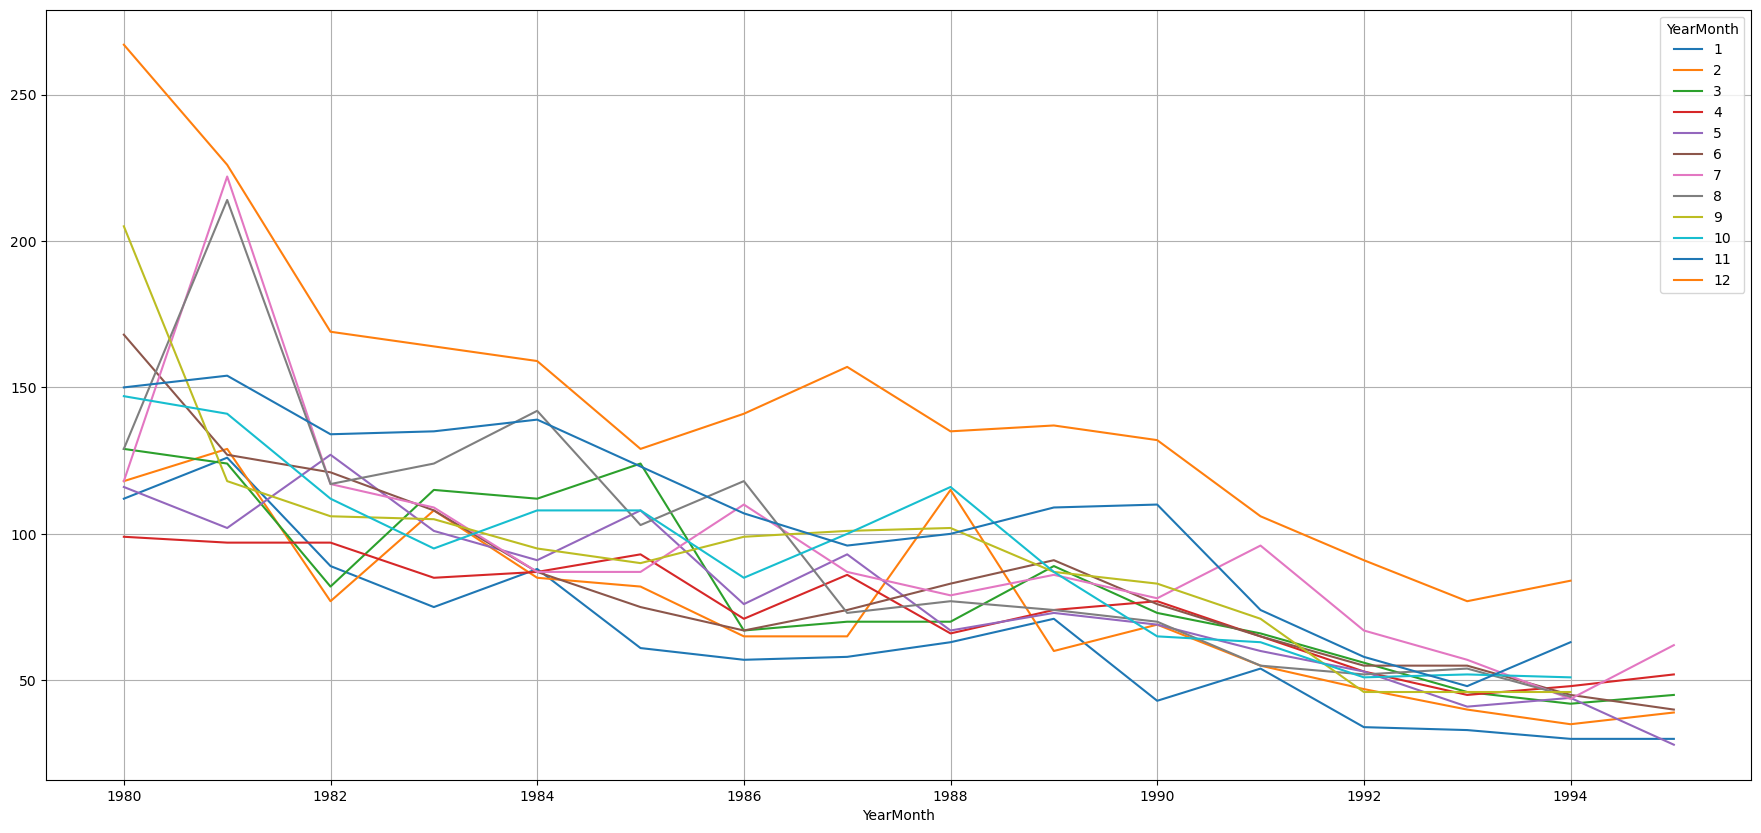

In [155]:
#yearly_sales_across_months
fig,ax=plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

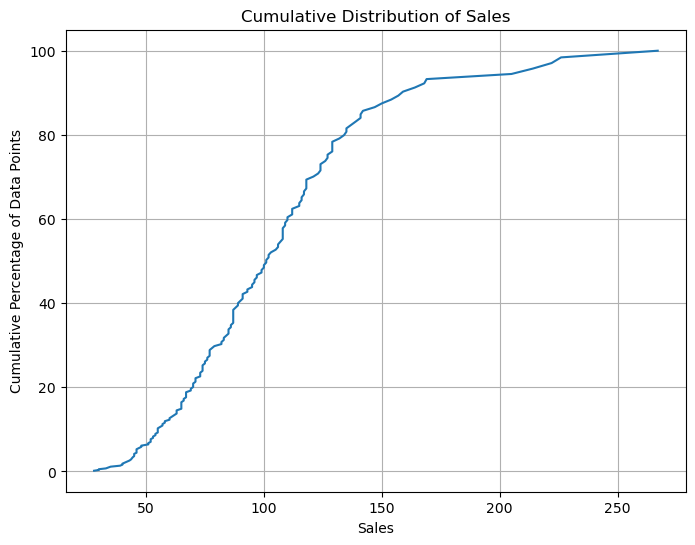

In [156]:
df_sorted = df_2.sort_values(by='Rose')

# Calculate cumulative distribution
total_sales = df_sorted['Rose'].sum()
df_sorted['Cumulative_Percentage'] = (df_sorted['Rose'].cumsum() / total_sales) * 100

# Plot the cumulative distribution
plt.figure(figsize=(8, 6))
plt.plot(df_sorted['Rose'], df_sorted['Cumulative_Percentage'])
plt.title('Cumulative Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Cumulative Percentage of Data Points')
plt.grid(True)
plt.show()

cumulative graph  tells us what percentage of data points refer to what number of sales

##### Perform Decomposition¶

In [157]:
from statsmodels.tsa.seasonal import seasonal_decompose

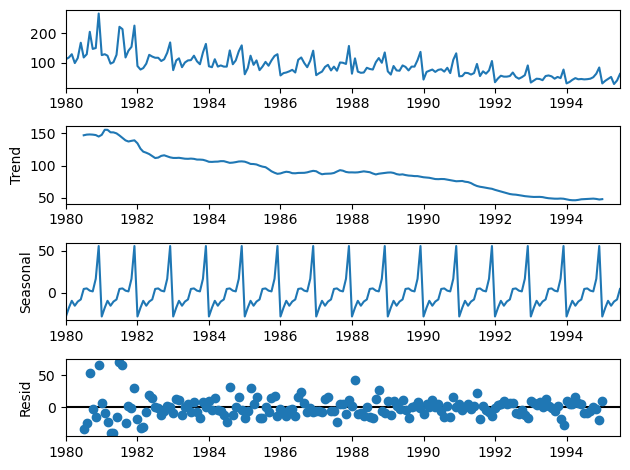

In [158]:
#additive decomposition
decomposition = seasonal_decompose(df_2,model='additive')
decomposition.plot();

strong strong seasonality present.

decreasing trend

In [159]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [160]:
print("trend--------------------------------")
print(trend.head())
print("seasonality---------------------------------")
print(seasonality.head())
print("residual------------------------------------")
print(residual.head())

trend--------------------------------
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64
seasonality---------------------------------
YearMonth
1980-01-01   -27.892492
1980-02-01   -17.422067
1980-03-01    -9.268509
1980-04-01   -15.081009
1980-05-01   -10.179223
Name: seasonal, dtype: float64
residual------------------------------------
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64


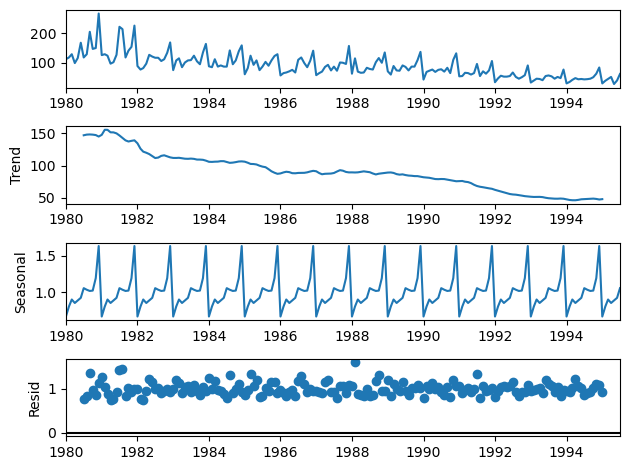

In [161]:
#multiplicative decomposition
decomposition = seasonal_decompose(df_2,model='multiplicative')
decomposition.plot();

residual is more in 1

for all residuals are locate around 1

In [162]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [163]:
print("trend--------------------------")
print(trend.head())
print("seasonality------------------------")
print(seasonality.head())
print("residual-------------------------------")
print(residual.head())

trend--------------------------
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: trend, dtype: float64
seasonality------------------------
YearMonth
1980-01-01    0.670317
1980-02-01    0.806374
1980-03-01    0.901496
1980-04-01    0.854406
1980-05-01    0.889755
Name: seasonal, dtype: float64
residual-------------------------------
YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
Name: resid, dtype: float64


## QUESTION-2
#### Data Pre-processing
##### - Missing value treatment - Visualize the processed data - Train-test split

In [164]:
#checking missing values
df_2.isnull().sum()

Rose    0
dtype: int64

In [165]:
#checking missing values
missing_rows = df_2[df_2.isnull().any(axis=1)]

# Print or view the rows with missing values
print(missing_rows)

Empty DataFrame
Columns: [Rose]
Index: []


In [166]:
## Interpolate missing values using spline interpolation
df_2['Rose'] = df_2['Rose'].interpolate(method='spline', order=3)

# Print the DataFrame with missing values removed and interpolated
print(df_2)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


we already treated the missing values.

##### Visualize the processed data

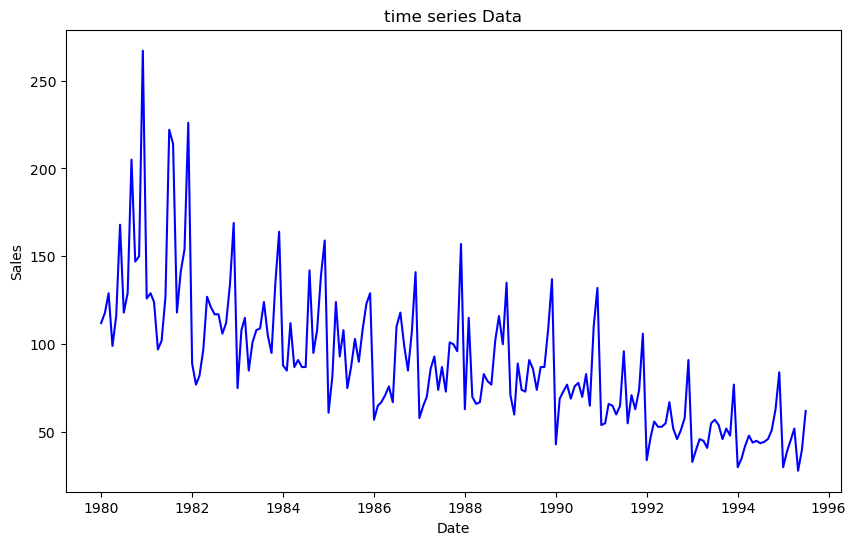

In [167]:
# Visualize the Processed Data
plt.figure(figsize=(10, 6))
plt.plot(df_2.index, df_2['Rose'], color='blue')
plt.title('time series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [168]:
#Train-test split

In [169]:
train=df_2[:int(len(df_2)*0.7)]
test     =   df_2[int(len(df_2)*0.7):]

In [170]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth       
1990-06-01  76.0
1990-07-01  78.0
1990-08-01  70.0
1990-09-01  83.0
1990-10-01  65.0

First few rows of Test Data


Rose
YearMonth        
1990-11-01  110.0
1990-12-01  132.0
1991-01-01   54.0
1991-02-01   55.0
1991-03-01   66.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [171]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


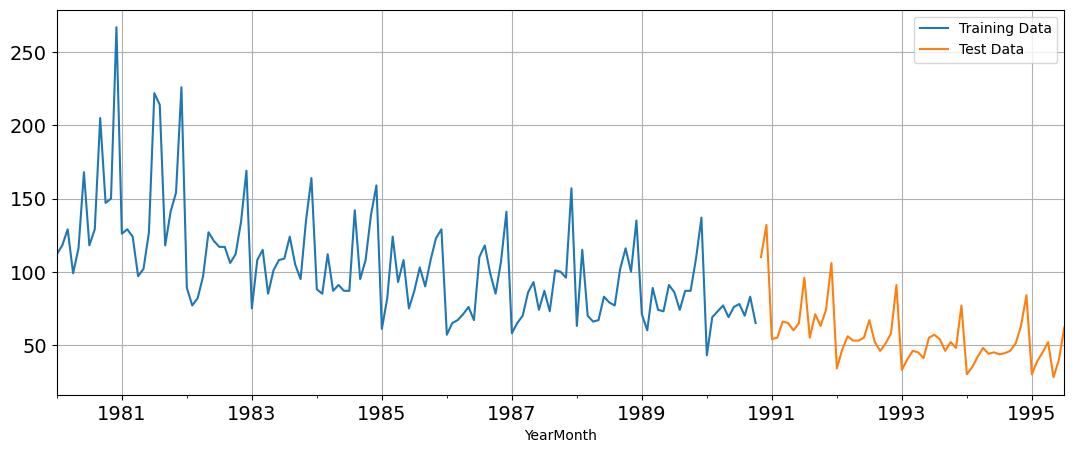

In [172]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### QUESTION- 3
#### Model Building - Original Data
#### - Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple) - Check the performance of the models built
##### ANSWER

In [173]:
#Build forecasting models

#### Linear regression 

For this particular linear regression, we are going to regress the 'Rose ' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.¶

In [174]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+131 for i in range(len(test))]

In [175]:
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [176]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [177]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
             Rose  time
YearMonth             
1990-06-01  76.0   126
1990-07-01  78.0   127
1990-08-01  70.0   128
1990-09-01  83.0   129
1990-10-01  65.0   130 

First few rows of Test Data 
              Rose  time
YearMonth              
1990-11-01  110.0   131
1990-12-01  132.0   132
1991-01-01   54.0   133
1991-02-01   55.0   134
1991-03-01   66.0   135 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯ to build the model on the training data and test the model on the test data.

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lr = LinearRegression()

In [180]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [181]:
test_pred_lr=lr.predict(LinearRegression_test[['time']])
LinearRegression_test["RegOnTime"] =test_pred_lr

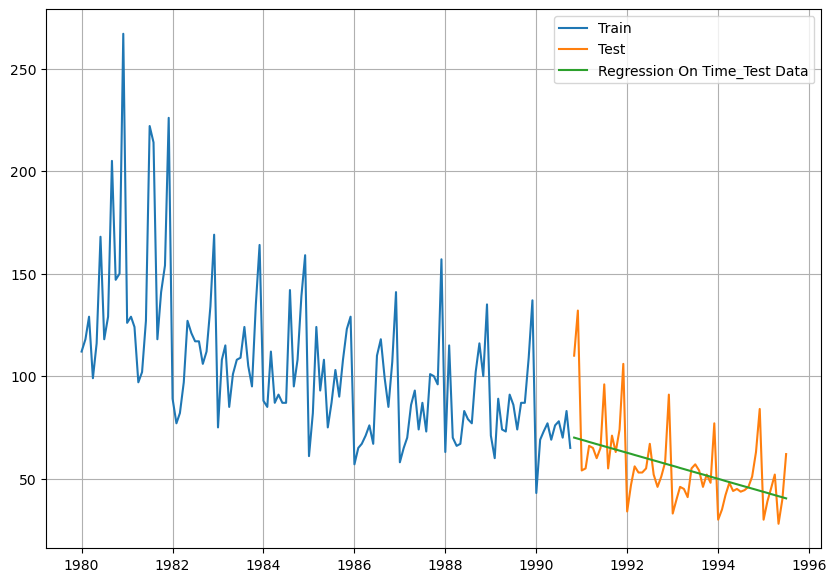

In [182]:
plt.figure(figsize=(10,7))
plt.plot(train["Rose"],label="Train")
plt.plot(test["Rose"],label="Test")
plt.plot(LinearRegression_test["RegOnTime"],label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [183]:
#Defining the accuracy metrics.
from sklearn import metrics

In [184]:
rmse_lr_test=metrics.mean_squared_error(test["Rose"],test_pred_lr,squared=False)

In [185]:
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_lr_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.36


In [186]:
#rmse table
resultsDf=pd.DataFrame({"Test_RMSE":[rmse_lr_test]},index=["Linear_Regression"])
resultsDf

Test_RMSE
Linear_Regression  17.361118

### Simple Average

In [187]:
#simple Average table
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                       
1990-11-01  110.0     104.692308
1990-12-01  132.0     104.692308
1991-01-01   54.0     104.692308
1991-02-01   55.0     104.692308
1991-03-01   66.0     104.692308

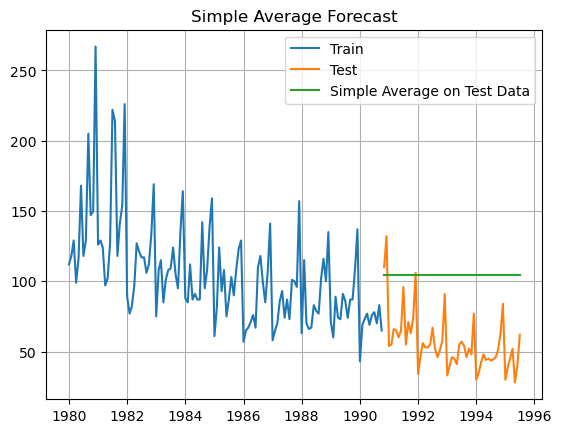

In [188]:
#Simple Average plot
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test["Rose"], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [189]:
rmse_simple_avg_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_avg_test))

For Simple Average forecast on the Test Data,  RMSE is 52.471


In [190]:
#rmse table
resultsDf_2=pd.DataFrame({"Test_RMSE":[rmse_simple_avg_test]},index=["simple_average"])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test_RMSE
Linear_Regression  17.361118
simple_average     52.471053

###### Method 3: Moving Average(MA)
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data.

In [191]:
Moving_avg=df_2.copy()
Moving_avg.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [192]:
Moving_avg['Trailing_2'] = Moving_avg['Rose'].rolling(2).mean()
Moving_avg['Trailing_4'] = Moving_avg['Rose'].rolling(4).mean()
Moving_avg['Trailing_6'] = Moving_avg['Rose'].rolling(6).mean()
Moving_avg['Trailing_9'] =Moving_avg['Rose'].rolling(9).mean()

Moving_avg.head()
#moving avg table

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

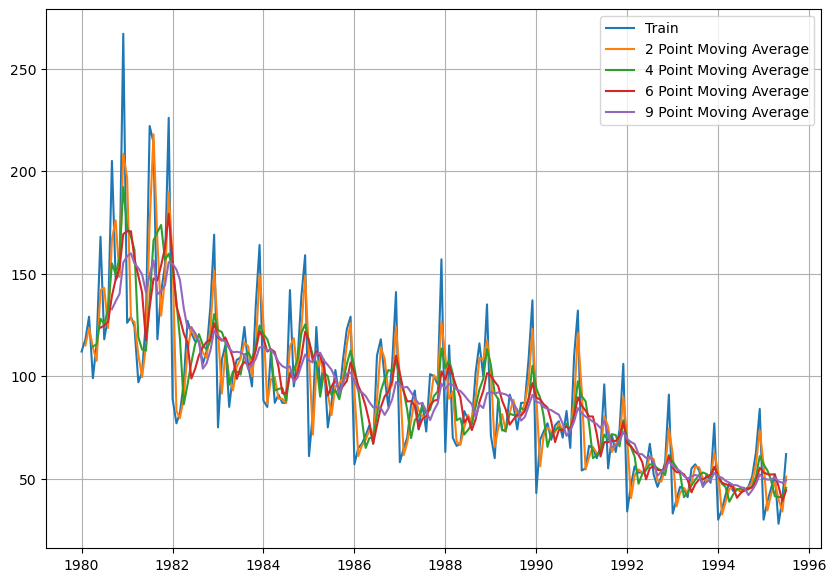

In [193]:
## Plotting on the whole data
plt.figure(figsize=(10,7))
plt.plot(Moving_avg['Rose'], label='Train')
plt.plot(Moving_avg['Trailing_2'], label='2 Point Moving Average')
plt.plot(Moving_avg['Trailing_4'], label='4 Point Moving Average')
plt.plot(Moving_avg['Trailing_6'],label = '6 Point Moving Average')
plt.plot(Moving_avg['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [194]:
#Creating train and test set 
trailing_Moving_avg_train=Moving_avg[0:int(len(Moving_avg)*0.7)] 
trailing_Moving_avg_test=Moving_avg[int(len(Moving_avg)*0.7):]

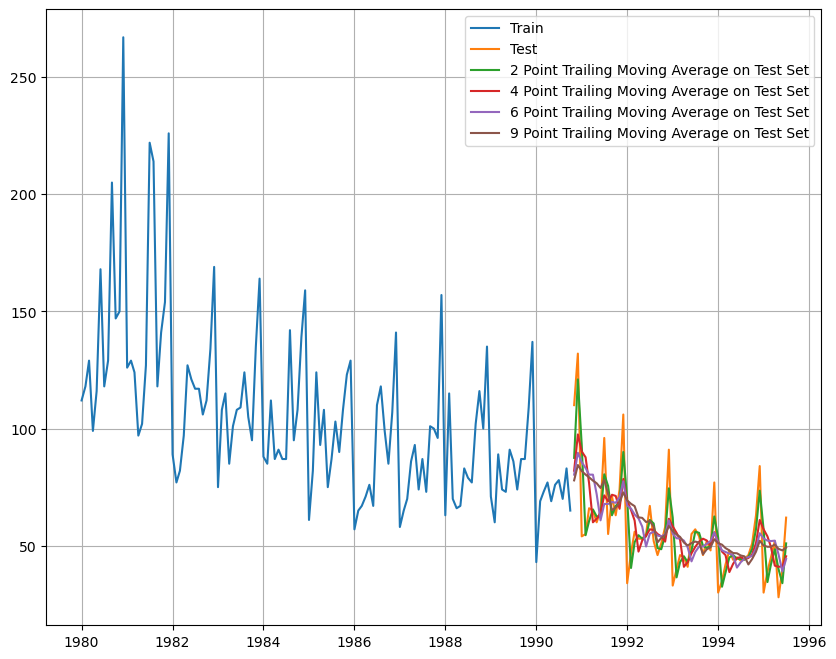

In [195]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,8))
plt.plot(trailing_Moving_avg_train['Rose'], label='Train')
plt.plot(trailing_Moving_avg_test['Rose'], label='Test')


plt.plot(trailing_Moving_avg_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Moving_avg_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Moving_avg_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_Moving_avg_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation
Done only on the test data.

In [196]:


## Test Data - RMSE  --> 2 point Trailing MA
rmse_mvg_avg_test_2= metrics.mean_squared_error(test['Rose'],trailing_Moving_avg_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_mvg_avg_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_mvg_avg_test_4 = metrics.mean_squared_error(test['Rose'],trailing_Moving_avg_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_mvg_avg_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_mvg_avg_test_6 = metrics.mean_squared_error(test['Rose'],trailing_Moving_avg_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_mvg_avg_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_mvg_avg_test_9= metrics.mean_squared_error(test['Rose'],trailing_Moving_avg_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_mvg_avg_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.802
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.377
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.881
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.353


In [197]:
#rmse Table
resultsDf_3= pd.DataFrame({'Test_RMSE': [rmse_mvg_avg_test_2,rmse_mvg_avg_test_4,rmse_mvg_avg_test_6,rmse_mvg_avg_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test_RMSE
Linear_Regression            17.361118
simple_average               52.471053
2pointTrailingMovingAverage  11.801894
4pointTrailingMovingAverage  15.376848
6pointTrailingMovingAverage  15.880520
9pointTrailingMovingAverage  16.352639

####  Exponential Models (Single, Double, Triple)
###### Single Exponential Smoothing Model¶

In [198]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
SES_train=train.copy()
SES_test=test.copy()

In [199]:
#build model
model_SES=SimpleExpSmoothing(SES_train["Rose"])

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [200]:
model_SES_autofit=model_SES.fit(optimized=True)

In [201]:
#SES summary
model_SES_autofit.params

{'smoothing_level': 0.10272107174707402,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.26277263347498,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [202]:
SES_test["predict"]=model_SES_autofit.forecast(steps=len(test))
SES_test.head()
#SES table

Rose    predict
YearMonth                   
1990-11-01  110.0  78.899521
1990-12-01  132.0  78.899521
1991-01-01   54.0  78.899521
1991-02-01   55.0  78.899521
1991-03-01   66.0  78.899521

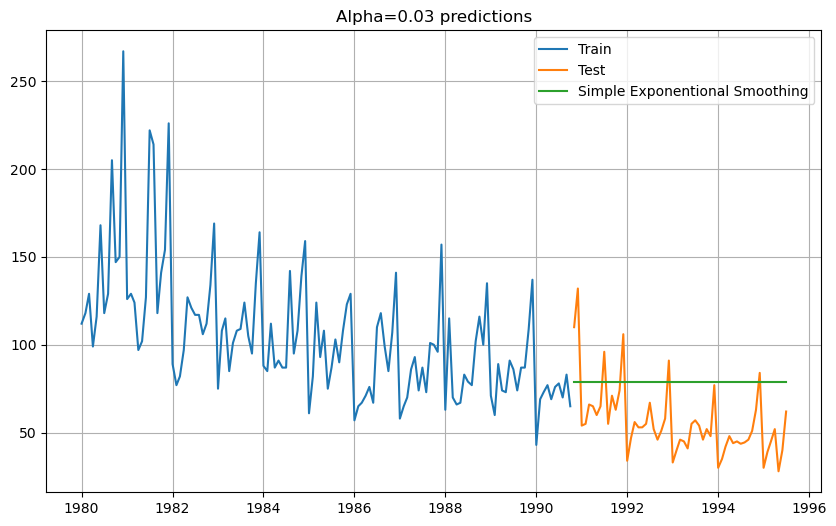

In [203]:
#SES plot
plt.figure(figsize=(10,6))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(SES_test["predict"],label="Simple Exponentional Smoothing")
plt.legend(loc="best")
plt.grid()
plt.title("Alpha=0.03 predictions");

In [204]:
rmse_SES_test=metrics.mean_squared_error(SES_test["Rose"],SES_test["predict"],squared=False)
print("For Alpha =0.10 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES_test))

For Alpha =0.10 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 30.247


In [205]:
#rmse Table
resultsDf_4= pd.DataFrame({'Test_RMSE': [rmse_SES_test]},index=['Alpha=0.10,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test_RMSE
Linear_Regression                      17.361118
simple_average                         52.471053
2pointTrailingMovingAverage            11.801894
4pointTrailingMovingAverage            15.376848
6pointTrailingMovingAverage            15.880520
9pointTrailingMovingAverage            16.352639
Alpha=0.10,SimpleExponentialSmoothing  30.246633

Setting different alpha values. Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again. We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.¶

In [206]:
#setting diiferent values
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [207]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=57)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2116753667.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2116753667.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2116753667.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2116753667.py:10: FutureWarning: The frame.append method is deprecated and will be remove

In [208]:
resultsDf_6

Alpha Values  Train RMSE  Test RMSE
0           0.3   32.292266  26.366492
1           0.4   32.893017  25.713296
2           0.5   33.578304  25.164534
3           0.6   34.372651  24.583998
4           0.7   35.288467  23.948148
5           0.8   36.330954  23.264723
6           0.9   37.507371  22.547073

In [209]:
#Model Evaluation
resultsDf_6.sort_values(by=["Test RMSE"],ascending=True)

Alpha Values  Train RMSE  Test RMSE
6           0.9   37.507371  22.547073
5           0.8   36.330954  23.264723
4           0.7   35.288467  23.948148
3           0.6   34.372651  24.583998
2           0.5   33.578304  25.164534
1           0.4   32.893017  25.713296
0           0.3   32.292266  26.366492

alpha=0.4  model has low test rmse

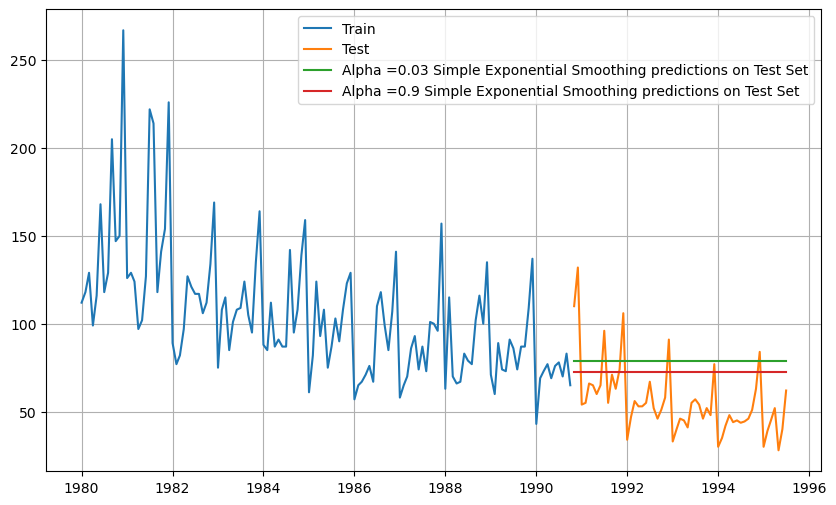

In [210]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,6))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.03 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [211]:
#rmse table
resultsDf_6_1 = pd.DataFrame({'Test_RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.9,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test_RMSE
Linear_Regression                      17.361118
simple_average                         52.471053
2pointTrailingMovingAverage            11.801894
4pointTrailingMovingAverage            15.376848
6pointTrailingMovingAverage            15.880520
9pointTrailingMovingAverage            16.352639
Alpha=0.10,SimpleExponentialSmoothing  30.246633
Alpha=0.9,SimpleExponentialSmoothing   22.547073

#### Double Exponential Smoothing (Holt's Model)

Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model

In [212]:
#build model
DES_train = train.copy()
DES_test = test.copy()
model_DES = Holt(DES_train['Rose'])

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [213]:
#setting different values
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [214]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=57)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3993978684.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3993978684.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3993978684.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3993978684.py:11: FutureWarning: The frame.appe

In [215]:

#sort values by Test Rmse 
resultsDf_7 .sort_values(by="Test RMSE").head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
1            0.3          0.4   37.287813  18.327400
12           0.4          0.7   40.744796  19.006943
9            0.4          0.4   37.990913  19.168311
17           0.5          0.4   38.598226  19.171709
8            0.4          0.3   36.682435  19.741417

Alpha=0.3,beta=0.4 have low test RMSE


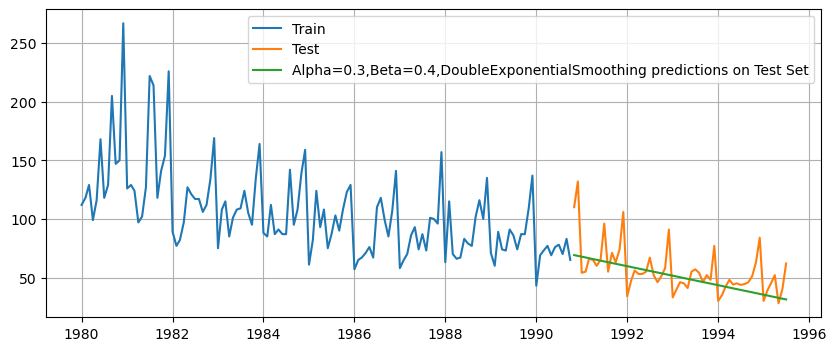

In [216]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,4))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.4], label='Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();


In [217]:
#rmse table
resultsDf_7_1 = pd.DataFrame({'Test_RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test_RMSE
Linear_Regression                              17.361118
simple_average                                 52.471053
2pointTrailingMovingAverage                    11.801894
4pointTrailingMovingAverage                    15.376848
6pointTrailingMovingAverage                    15.880520
9pointTrailingMovingAverage                    16.352639
Alpha=0.10,SimpleExponentialSmoothing          30.246633
Alpha=0.9,SimpleExponentialSmoothing           22.547073
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing  18.327400

#### Triple Exponential Smoothing (Holt - Winter's Model)
Three parameters 𝛼   , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.¶


In [218]:
TES_train = train.copy()
TES_test = test.copy()


In [219]:
#build model
model_TES=ExponentialSmoothing(TES_train["Rose"],trend="additive",seasonal="multiplicative")

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [220]:
model_TES_autofit=model_TES.fit()

In [221]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
YearMonth                      
1990-11-01  110.0     86.307069
1990-12-01  132.0    118.002257
1991-01-01   54.0     51.939718
1991-02-01   55.0     58.202028
1991-03-01   66.0     63.090227

In [222]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
YearMonth                      
1990-11-01  110.0     86.307069
1990-12-01  132.0    118.002257
1991-01-01   54.0     51.939718
1991-02-01   55.0     58.202028
1991-03-01   66.0     63.090227

In [223]:
#model_TES summary
model_TES_autofit.params

{'smoothing_level': 0.09954161352526007,
 'smoothing_trend': 1.3336303508710234e-09,
 'smoothing_seasonal': 1.2069328449342624e-07,
 'damping_trend': nan,
 'initial_level': 158.17849976224244,
 'initial_trend': -0.6388610685846876,
 'initial_seasons': array([0.69310878, 0.78335434, 0.8565105 , 0.75118137, 0.84323397,
        0.90831655, 0.99998662, 1.06934491, 1.00122429, 0.98484092,
        1.13241501, 1.56136821]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

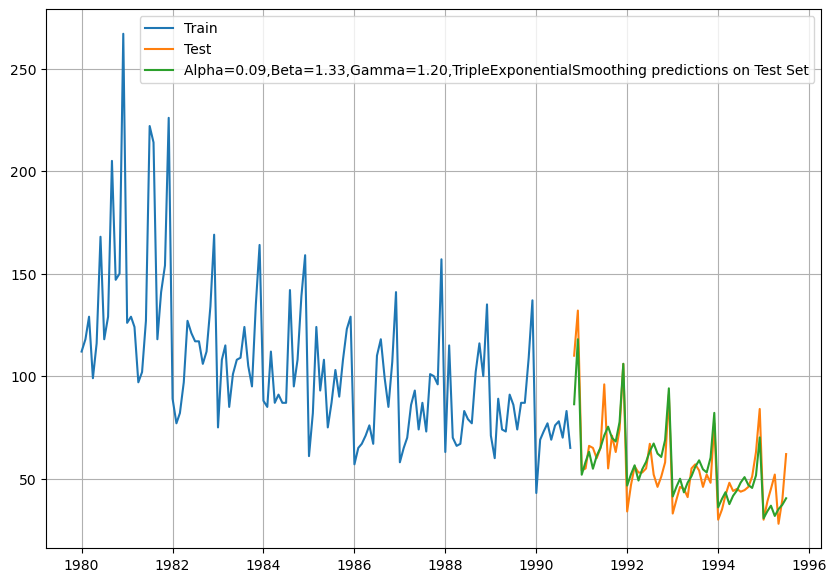

In [224]:
#TripleExponentialSmoothing
plt.figure(figsize=(10,7))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.09,Beta=1.33,Gamma=1.20,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [225]:
rmse_TES_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.09,Beta=1.33,Gamma=1.20, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_TES_test_1))

For Alpha=0.09,Beta=1.33,Gamma=1.20, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 9.350


In [226]:
#rmse table
resultsDf_8= pd.DataFrame({'Test_RMSE': [rmse_TES_test_1]}
                           ,index=['Alpha=0.09,Beta=1.33,Gamma=1.20,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test_RMSE
Linear_Regression                                   17.361118
simple_average                                      52.471053
2pointTrailingMovingAverage                         11.801894
4pointTrailingMovingAverage                         15.376848
6pointTrailingMovingAverage                         15.880520
9pointTrailingMovingAverage                         16.352639
Alpha=0.10,SimpleExponentialSmoothing               30.246633
Alpha=0.9,SimpleExponentialSmoothing                22.547073
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.327400
Alpha=0.09,Beta=1.33,Gamma=1.20,TripleExponenti...   9.350380

In [227]:

#set different values
resultsDf_8_1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_1



Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [228]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=57)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_1 = resultsDf_8_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2612870727.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_1 = resultsDf_8_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2612870727.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_1 = resultsDf_8_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2612870727.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_1 = resultsDf_8_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\2612870727.py:12: FutureWarning: The frame.append method is deprecated and

In [229]:
resultsDf_8_1 .head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
0           0.3          0.3           0.3   23.385275   77.618054
1           0.3          0.3           0.4   24.663714   85.176663
2           0.3          0.3           0.5   26.315722   99.247663
3           0.3          0.3           0.6   28.443126  116.384370
4           0.3          0.3           0.7   31.169740  132.001484

In [230]:
#sort values by test rmse
resultsDf_8_1.sort_values(by="Test RMSE").head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
33            0.3          0.7           0.4   29.968505  28.301212
177           0.5          0.9           0.4   41.232290  28.896346
25            0.3          0.6           0.4   27.743621  39.592384
78            0.4          0.4           0.9   43.001123  51.487296
135           0.5          0.3           1.0   47.353331  62.101747

alpha=0.3,beta=0.7,gamma=0.4 model has lowest RMSE value

In [231]:
#rmse table
resultsDf_8_3 = pd.DataFrame({'Test_RMSE': [resultsDf_8_1.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test_RMSE
Linear_Regression                                   17.361118
simple_average                                      52.471053
2pointTrailingMovingAverage                         11.801894
4pointTrailingMovingAverage                         15.376848
6pointTrailingMovingAverage                         15.880520
9pointTrailingMovingAverage                         16.352639
Alpha=0.10,SimpleExponentialSmoothing               30.246633
Alpha=0.9,SimpleExponentialSmoothing                22.547073
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.327400
Alpha=0.09,Beta=1.33,Gamma=1.20,TripleExponenti...   9.350380
Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialS...  28.301212

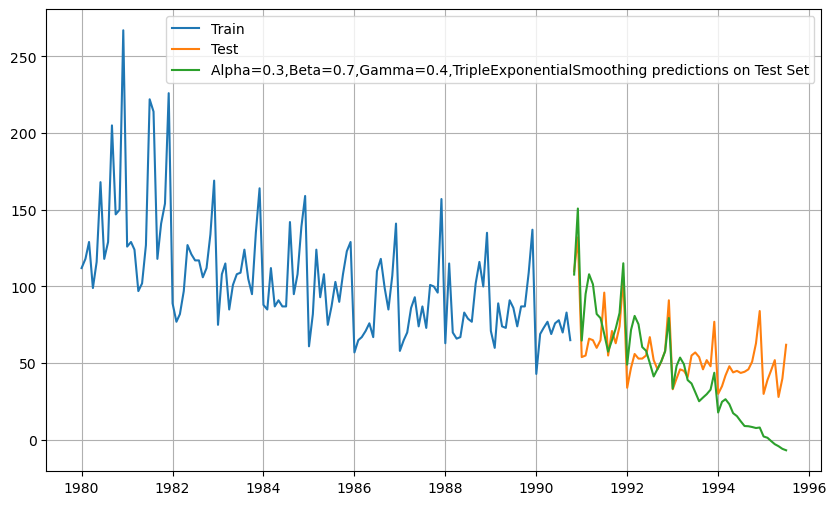

In [232]:
#TripleExponentialSmoothing
plt.figure(figsize=(10,6))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.3, 0.7000000000000002, 0.4], label='Alpha=0.3,Beta=0.7,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

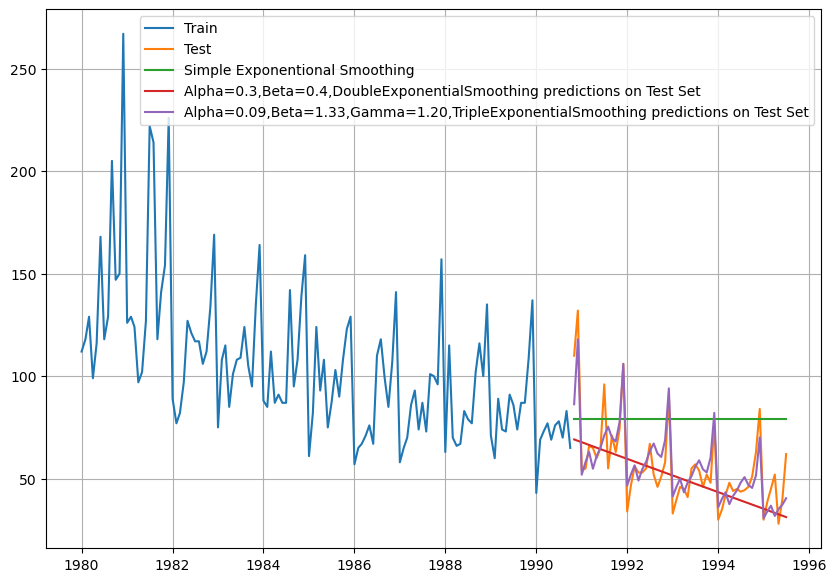

In [233]:
#all Exponentional Smoothing
plt.figure(figsize=(10,7))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(SES_test["predict"],label="Simple Exponentional Smoothing")
plt.plot(DES_test['predict', 0.3, 0.4], label='Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.09,Beta=1.33,Gamma=1.20,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()

#### QUESTION-4
###### Check for Stationarity, Check for stationarity - Make the data stationary (if needed)
###### Dicky Fuller Test
###### H0:Time series is not stationary
###### H1:Time series is stationary

In [234]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(time_series):
    #Determing rolling statistics
    rolmean=time_series.rolling(window=7).mean()
    rolstd=time_series.rolling(window=7).std()
    
    #Plot rolling statistics:
    orig = plt.plot(time_series, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest=adfuller(time_series, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

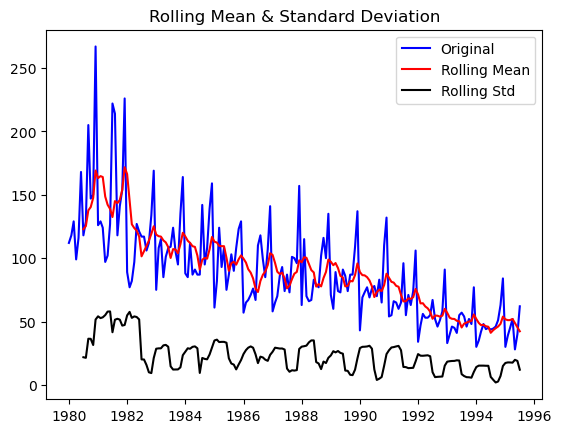

Results of Dickey-Fuller Test:
Test Statistic                  -1.873514
p-value                          0.344622
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [235]:
#stationarity plot of orginal series
test_stationarity(df_2['Rose'])

p-value is greater than 0.05

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

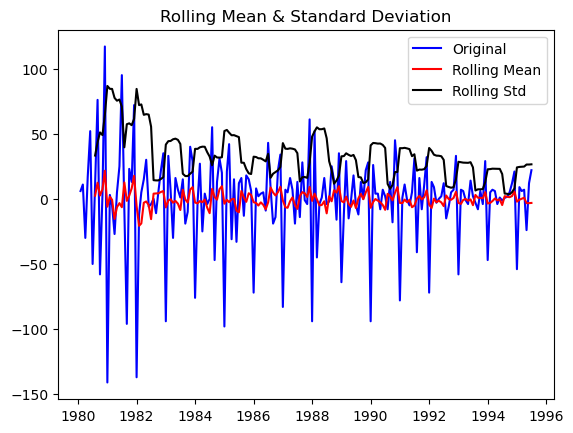

Results of Dickey-Fuller Test:
Test Statistic                -8.043389e+00
p-value                        1.821563e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [236]:
#stationarity plot of 1 diff Time series
test_stationarity(df_2['Rose'].diff().dropna())

p-value less than 0.05 so the 1 difference of the time series is stationary.

### QUESTION-5
##### Model Building - Stationary Data
###### Generate ACF & PACF Plot and find the AR, MA values. - Build different ARIMA models - Auto ARIMA - Manual ARIMA - Build different SARIMA models - Auto SARIMA - Manual SARIMA - Check the performance of the models built
###### Generate ACF


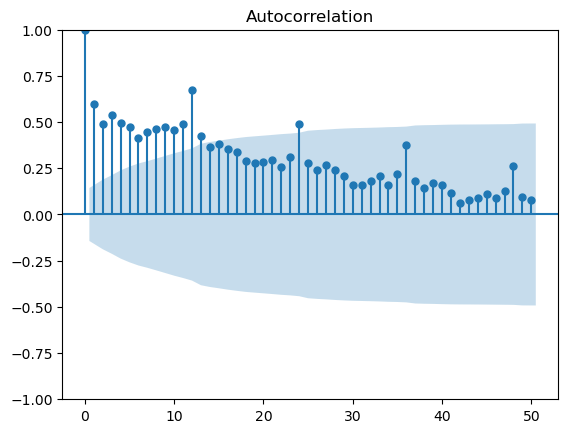

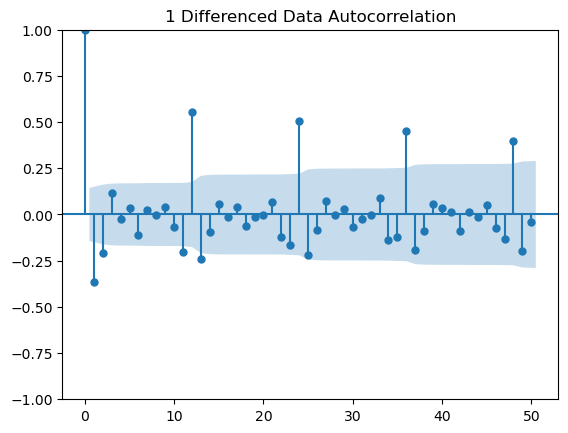

In [237]:
#plot ACF,PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_2['Rose'],lags=50)
plot_acf(df_2['Rose'].diff().dropna(),lags=50,title='1 Differenced Data Autocorrelation')
plt.show()

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


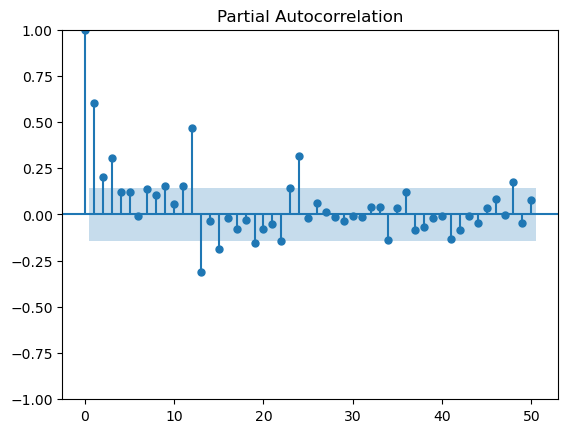

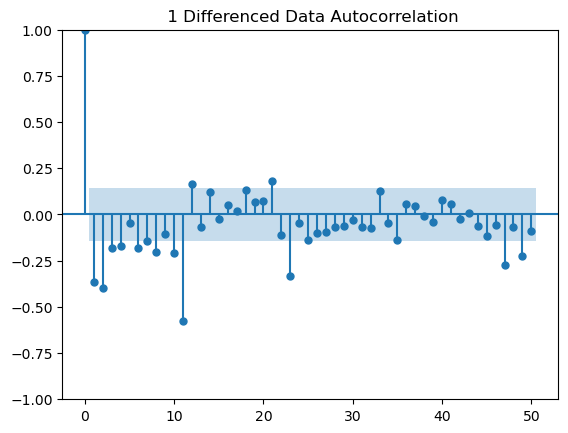

In [238]:
plot_pacf(df_2['Rose'],lags=50)
plot_pacf(df_2['Rose'].diff().dropna(),lags=50,title=' 1 Differenced Data Autocorrelation')
plt.show()

AR=3 (from PACF) ,MA=0 (from ACF)


after
for 1 difference time series

AR=5 (FROM PACF), MA=3 (FROM ACF)

#### Build different ARIMA models - Auto ARIMA - Manual ARIMA -
#Auto ARIMA

In [239]:
import itertools
p=q=range(0,3)
d= range(1,2)
pdq=list(itertools.product(p,d,q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print("model:  {}".format(pdq[i]))

Some parameter combinations for the Model...
model:  (0, 1, 1)
model:  (0, 1, 2)
model:  (1, 1, 0)
model:  (1, 1, 1)
model:  (1, 1, 2)
model:  (2, 1, 0)
model:  (2, 1, 1)
model:  (2, 1, 2)


In [240]:
#set different values
ARIMA_AIC=pd.DataFrame(columns=["param","AIC"])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [241]:
from statsmodels.tsa.arima.model import ARIMA
for param in pdq:
    ARIMA_MODEL=ARIMA(train["Rose"].values,order=param).fit()
    print("ARIMA{}-AIC:{}".format(param, ARIMA_MODEL.aic))
    ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)

ARIMA(0, 1, 0)-AIC:1313.1758613526429
ARIMA(0, 1, 1)-AIC:1261.3274438405808
ARIMA(0, 1, 2)-AIC:1259.2477803151237


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\1333580595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\1333580595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\1333580595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


ARIMA(1, 1, 0)-AIC:1297.0772943848615
ARIMA(1, 1, 1)-AIC:1260.0367627036055


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\1333580595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\1333580595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


ARIMA(1, 1, 2)-AIC:1259.4732049501201
ARIMA(2, 1, 0)-AIC:1278.1352807484318


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\1333580595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\1333580595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


ARIMA(2, 1, 1)-AIC:1261.0140762916922


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\1333580595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


ARIMA(2, 1, 2)-AIC:1261.4720006569005


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\1333580595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC= ARIMA_AIC.append({"param":param,"AIC":ARIMA_MODEL.aic},ignore_index=True)


In [242]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1259.247780
5  (1, 1, 2)  1259.473205
4  (1, 1, 1)  1260.036763
7  (2, 1, 1)  1261.014076
1  (0, 1, 1)  1261.327444
8  (2, 1, 2)  1261.472001
6  (2, 1, 0)  1278.135281
3  (1, 1, 0)  1297.077294
0  (0, 1, 0)  1313.175861

(0, 1, 2)	1259.247780        
p=0,d=1,q=2 have lowest AIC value

In [243]:
auto_ARIMA = ARIMA(train['Rose'], order=(0, 1, 2), freq="MS")

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [244]:
results_auto_ARIMA = auto_ARIMA.fit()

In [245]:
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -626.624
Date:                Sun, 21 Apr 2024   AIC                           1259.248
Time:                        21:16:19   BIC                           1267.827
Sample:                    01-01-1980   HQIC                          1262.734
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7059      0.072     -9.851      0.000      -0.846      -0.565
ma.L2         -0.1915      0.074     -2.574      0.010      -0.337      -0.046
sigma2       958.5998     86.875     11.034      0.0

In [246]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [247]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

30.962207900801978


In [248]:
resultsDf0 = pd.DataFrame({'Test_RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])
resultsDf0

Test_RMSE
ARIMA(0,1,2)  30.962208

##### manual_arima_model

In [249]:
manual_ARIMA = ARIMA(train['Rose'], order=(1, 1, 2), freq="MS")

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [250]:
results_manual_ARIMA = manual_ARIMA.fit()

In [251]:
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -625.737
Date:                Sun, 21 Apr 2024   AIC                           1259.473
Time:                        21:16:20   BIC                           1270.912
Sample:                    01-01-1980   HQIC                          1264.121
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4649      0.274     -1.698      0.090      -1.002       0.072
ma.L1         -0.2485      0.253     -0.983      0.326      -0.744       0.247
ma.L2         -0.5971      0.208     -2.874      0.0

In [252]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [253]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse)

30.52646143714676


In [254]:
resultsDf_2 = pd.DataFrame({'Test_RMSE': [rmse]}
                           ,index=[' manual ARIMA(1,1,2)'])
resultsDf0=pd.concat([resultsDf0,resultsDf_2])
resultsDf0

Test_RMSE
ARIMA(0,1,2)          30.962208
 manual ARIMA(1,1,2)  30.526461

#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).¶¶

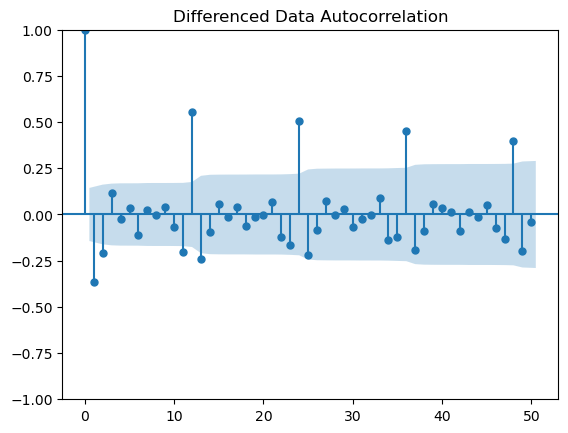

In [255]:
plot_acf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =12 and thus using the same

p-(0 to 2)
d-(1)
q-(0 to 2)
P-(0 to 2)
D-(0)
Q-(0 to 2)
Seasonality-12

In [256]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [257]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [258]:
import statsmodels.api as sm
import statsmodels.api as sm
for param in pdq:
    for parm_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=parm_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, parm_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1303.984314159292
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1127.0323185121727


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:956.4131665692053
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1121.3977282304234


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1097.166579524692


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:950.6998497229065
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:941.2946512703303


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:943.2558966541919


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:936.3148887532496
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1242.5766056799905


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1079.9832204946451


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:904.3132399734166


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1078.2285176554694


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1035.724151027851


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:901.6481142950789


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:897.5837355743929


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:898.6607999294846


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:884.3850768411625
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1231.2314145388962


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1065.3891799670982


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:894.4419226275872


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1071.6440642890605


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1026.7446561827126


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:888.1231053551415


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:895.877218360176


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:897.3300959467199


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:871.075238337281
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1287.8863498975584
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1117.016146724155


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:943.5830348969488
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1106.472067734699


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1086.836720038988


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:939.0945779695297


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:919.9038293902976


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:921.857050221362


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:923.4855356955268
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1241.630049257512


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1076.1592752570714


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:903.9456130482093


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1066.1584467972755


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1035.7723005489374


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:899.5130609044737


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:888.7495145596783


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:890.3875310825065


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:883.6660397652583
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1231.5587519588044


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1067.3841149203404


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:896.4380105286075


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1064.1976587445238


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1024.1455723762951


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:890.0396977636177


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:889.0946818257589


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:890.6421556284231


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:873.0038751353026
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1259.7833248707425


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1110.4741741739772


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:938.0326522143414
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1081.4099214593268


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1057.6713554219953


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:932.3204745301118


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:905.5948860010906


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:907.233062320695


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:909.1483851063473
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1242.7200244071116


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1075.9999714658713


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:904.009052225004


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1054.3659020717967


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1034.3832672143012


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:899.8125434660537


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:879.7923634513123


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:881.2073386963305


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:882.9435022270242


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1233.5045954992459


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1065.639334526573


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:897.3204208166843


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1056.2515450541325


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1025.7508986123514


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:890.6376682048328


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:880.7638572023584


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:882.1078735146465


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:874.213960898848


C:\Users\SABIR\AppData\Local\Temp\ipykernel_19808\3105300213.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':parm_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [259]:
SARIMA_AIC.sort_values(by="AIC",ascending=True).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  871.075238
53  (1, 1, 2)  (2, 0, 2, 12)  873.003875
80  (2, 1, 2)  (2, 0, 2, 12)  874.213961
69  (2, 1, 1)  (2, 0, 0, 12)  879.792363
78  (2, 1, 2)  (2, 0, 0, 12)  880.763857

In [260]:
#sarima summary
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train["Rose"].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -428.538
Date:                            Sun, 21 Apr 2024   AIC                            871.075
Time:                                    21:17:22   BIC                            889.450
Sample:                                         0   HQIC                           878.516
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8367    239.114     -0.003      0.997    -469.492     467.819
ma.L2         -0.1633     39.028   

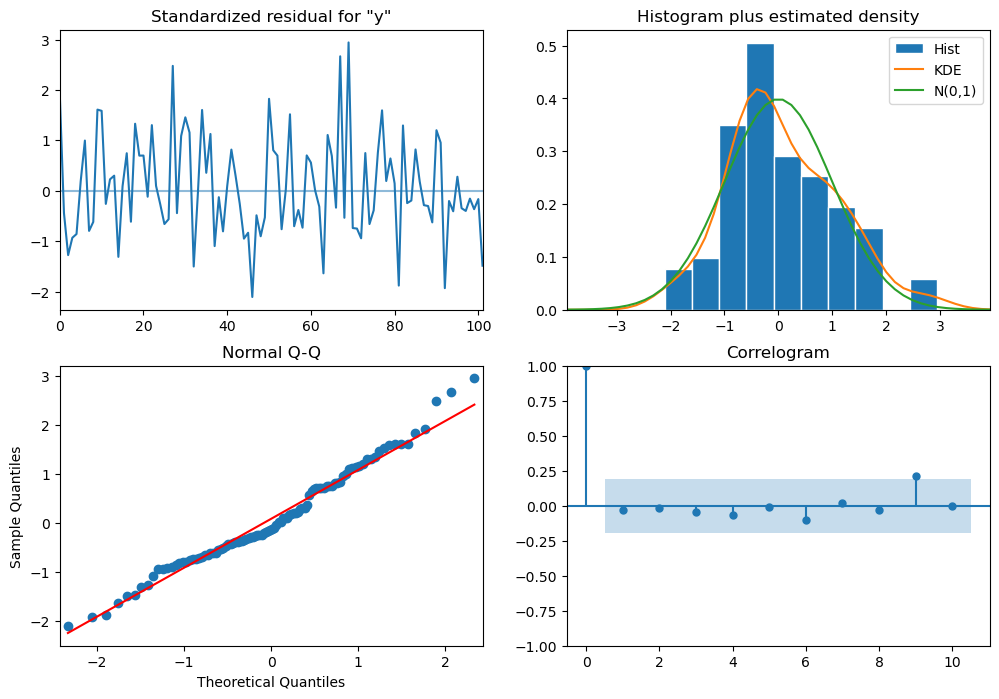

In [261]:
#diagnostics plot of SARIMA
results_auto_SARIMA_6.plot_diagnostics(figsize=(12, 8))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.



In [262]:
#Predict on the Test Set using this model and evaluate the model.
predicted_auto_SARIMA_6 =results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0   90.849106  15.914360      59.657533     122.040679
1  114.913416  16.150397      83.259220     146.567612
2   60.936673  16.150397      29.282477      92.590869
3   70.599289  16.150396      38.945094     102.253484
4   76.843515  16.150393      45.189326     108.497704

In [263]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

25.405804609167674


In [264]:
temp_resultsDf = pd.DataFrame({'Test_RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])

In [265]:
resultsDf0 = pd.concat([resultsDf0,temp_resultsDf])
resultsDf0

Test_RMSE
ARIMA(0,1,2)             30.962208
 manual ARIMA(1,1,2)     30.526461
SARIMA(0,1,2)(2,0,2,12)  25.405805

#### manual_SARIMA

In [266]:
#manual_SARIMA summary
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train["Rose"].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -428.502
Date:                            Sun, 21 Apr 2024   AIC                            873.004
Time:                                    21:17:27   BIC                            894.004
Sample:                                         0   HQIC                           881.507
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1002      0.350      0.286      0.775      -0.587       0.787
ma.L1         -0.9391    319.747   

In [267]:
#Predict on the Test Set using this model and evaluate the model.
predicted_manual_SARIMA_6 =results_manual_SARIMA_6.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0   91.009364  15.904129      59.837844     122.180884
1  114.696368  16.134078      83.074156     146.318579
2   60.836606  16.139005      29.204737      92.468474
3   70.599103  16.139318      38.966620     102.231586
4   76.889886  16.139345      45.257351     108.522420

In [268]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

25.483993066473502


In [269]:
temp_resultsDf = pd.DataFrame({'Test_RMSE': [rmse]}
                           ,index=['manual SARIMA(1,1,2)(2,0,2,12)'])

In [270]:
#rmse table
resultsDf0=pd.concat([resultsDf0,temp_resultsDf])
resultsDf0

Test_RMSE
ARIMA(0,1,2)                    30.962208
 manual ARIMA(1,1,2)            30.526461
SARIMA(0,1,2)(2,0,2,12)         25.405805
manual SARIMA(1,1,2)(2,0,2,12)  25.483993

## 6- Compare the performance of the models
Compare the performance of all the models built - Choose the best model with proper rationale - Rebuild the best model using the entire data - Make a forecast for the next 12 months


In [271]:
resultsDf0

Test_RMSE
ARIMA(0,1,2)                    30.962208
 manual ARIMA(1,1,2)            30.526461
SARIMA(0,1,2)(2,0,2,12)         25.405805
manual SARIMA(1,1,2)(2,0,2,12)  25.483993

In [272]:
resultsDf=pd.concat([resultsDf,resultsDf0])
resultsDf

Test_RMSE
Linear_Regression                                   17.361118
simple_average                                      52.471053
2pointTrailingMovingAverage                         11.801894
4pointTrailingMovingAverage                         15.376848
6pointTrailingMovingAverage                         15.880520
9pointTrailingMovingAverage                         16.352639
Alpha=0.10,SimpleExponentialSmoothing               30.246633
Alpha=0.9,SimpleExponentialSmoothing                22.547073
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.327400
Alpha=0.09,Beta=1.33,Gamma=1.20,TripleExponenti...   9.350380
Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialS...  28.301212
ARIMA(0,1,2)                                        30.962208
 manual ARIMA(1,1,2)                                30.526461
SARIMA(0,1,2)(2,0,2,12)                             25.405805
manual SARIMA(1,1,2)(2,0,2,12)                      25.483993

In [273]:
#rmse Table sort by test rmse value
resultsDf.sort_values(by="Test_RMSE")

Test_RMSE
Alpha=0.09,Beta=1.33,Gamma=1.20,TripleExponenti...   9.350380
2pointTrailingMovingAverage                         11.801894
4pointTrailingMovingAverage                         15.376848
6pointTrailingMovingAverage                         15.880520
9pointTrailingMovingAverage                         16.352639
Linear_Regression                                   17.361118
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.327400
Alpha=0.9,SimpleExponentialSmoothing                22.547073
SARIMA(0,1,2)(2,0,2,12)                             25.405805
manual SARIMA(1,1,2)(2,0,2,12)                      25.483993
Alpha=0.7,Beta=0.4,Gamma=0.3,TripleExponentialS...  28.301212
Alpha=0.10,SimpleExponentialSmoothing               30.246633
 manual ARIMA(1,1,2)                                30.526461
ARIMA(0,1,2)                                        30.962208
simple_average                                      52.471053

best model is Alpha=0.09,Beta=1.33,Gamma=1.20,TripleExponentialSmoothing--------Test_RMSE	9.350380

#### Rebuild the best model using the entire data - Make a forecast for the next 12 months

In [274]:
full_data_model =  sm.tsa.ExponentialSmoothing(df_2['Rose'],trend='additive',seasonal='multiplicative')
results_full_data_model = full_data_model.fit()
print(results_full_data_model.summary())

c:\Users\SABIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                          48488.079
Optimized:                         True   AIC                           1071.339
Trend:                         Additive   BIC                           1123.037
Seasonal:                Multiplicative   AICC                          1075.411
Seasonal Periods:                    12   Date:                 Sun, 21 Apr 2024
Box-Cox:                          False   Time:                         21:17:29
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1071715                alpha                 True
smoothing_trend          

#### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).predicted Triple_exponestional

In [275]:
# Forecast the next 12 months
forecast_12_months = results_full_data_model.forecast(steps=12)

print("Forecast for the next 12 months:")
print(forecast_12_months)


Forecast for the next 12 months:
1995-08-01    47.455930
1995-09-01    44.232509
1995-10-01    43.131381
1995-11-01    49.386764
1995-12-01    67.139919
1996-01-01    28.928032
1996-02-01    32.391050
1996-03-01    35.217873
1996-04-01    31.015830
1996-05-01    33.395872
1996-06-01    35.625093
1996-07-01    39.344315
Freq: MS, dtype: float64


In [276]:
rmse = mean_squared_error(df_2['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 16.10262518586643


In [277]:
#forcasted Table
forecast_df = pd.DataFrame(forecast_12_months, columns=['Rose'])
forecast_df 

Rose
1995-08-01  47.455930
1995-09-01  44.232509
1995-10-01  43.131381
1995-11-01  49.386764
1995-12-01  67.139919
1996-01-01  28.928032
1996-02-01  32.391050
1996-03-01  35.217873
1996-04-01  31.015830
1996-05-01  33.395872
1996-06-01  35.625093
1996-07-01  39.344315

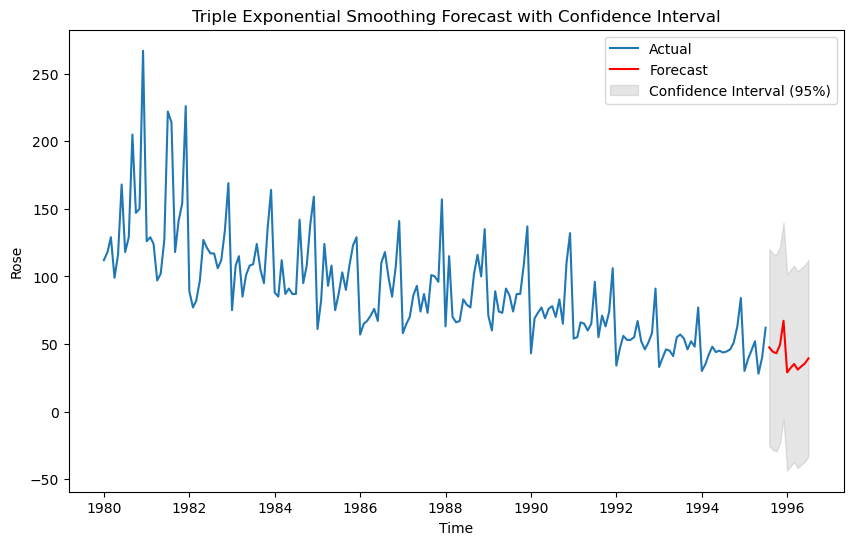

In [278]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_2['Rose'], label='Actual')
plt.plot(forecast_12_months, color='red', label='Forecast')
plt.fill_between(
    forecast_12_months.index,
    forecast_12_months - 1.96 * results_full_data_model.fittedvalues.std(),
    forecast_12_months + 1.96 * results_full_data_model.fittedvalues.std(),
    color='gray', alpha=0.2, label='Confidence Interval (95%)'
)
plt.legend()
plt.title('Triple Exponential Smoothing Forecast with Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Rose')
plt.show()

##  Actionable Insights & Recommendations
Conclude with the key takeaways (actionable insights and recommendations) for the business
#### Inference
* Rose wine sales shown a decrease  in trend on year-on-year  basis
* December month has the highest sales in a year.
* Model plot was build based on trend and seasonality.we see the future prediction is inline with the previous year prediction.
##### Recommendation
* Rose wine sale are seasonal
* we are able to see the Rose wines are sold highly during March/August/October till December.
* Company should plan a head and keep enough stock from september till december to captlize on the demand
* In order to increase the sales company should plan some promotional offers during the low sale period